# Makkah Weather Analysis
# Part 1: Data Acquisition and Exploring

In [1]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sktime.utils.plotting.forecasting import plot_ys

import warnings

warnings.filterwarnings("ignore")

# Content:
## 0- Acquiring Data
## 1- Load Data
## 2- Clean Data

## 3- Exploratory Analysis
(*Total number of questions is 5*)
- Pattern of Temperature Daily, Monthly and yearly (Minimum, Maximum and Average)
- Maximum and Minimum Recorded Temperatures from 2009 to 2020 
- Average Temperature, Wind Speed, Humidity And Barometer Each Year Grouped By Month
- Temperature, Wind Speed, Humidity And Barometer Distributions
- Weather Condition Count And Its Percentage


## 4- Save Data



===================================

## 0- Acquiring Data

#### This data was collected from TimeAndDate website from September 10th 2009 to September 29th 2020 .
www.timeanddate.com

# 1- Load Data

In [2]:
makkah_weather = pd.read_csv('../data/makkah_weather.csv')
makkah_weather.head()

,city,date,hour,temperature,condition,wind,humidity,barometer,visibility
0,makkah,11-09-09,00:00:00,30.0,Clear,7,0.62,1005.0,16�
1,makkah,11-09-09,01:00:00,28.0,Clear,No wind,0.66,1004.0,16�
2,makkah,11-09-09,02:00:00,27.0,Clear,7,0.66,1004.0,16�
3,makkah,11-09-09,03:00:00,27.0,Clear,7,0.66,1004.0,16�
4,makkah,11-09-09,04:00:00,27.0,Clear,No wind,0.66,1004.0,16�


# 2- Clean Data

In [3]:
# Create datetime object and drop hour
makkah_weather['date'] = makkah_weather.date +' '+ makkah_weather.hour
makkah_weather['date'] = pd.to_datetime(makkah_weather['date'],  dayfirst=True, errors='coerce')
makkah_weather.drop('hour', axis=1, inplace=True)
makkah_weather.head()

,city,date,temperature,condition,wind,humidity,barometer,visibility
0,makkah,2009-09-11 00:00:00,30.0,Clear,7,0.62,1005.0,16�
1,makkah,2009-09-11 01:00:00,28.0,Clear,No wind,0.66,1004.0,16�
2,makkah,2009-09-11 02:00:00,27.0,Clear,7,0.66,1004.0,16�
3,makkah,2009-09-11 03:00:00,27.0,Clear,7,0.66,1004.0,16�
4,makkah,2009-09-11 04:00:00,27.0,Clear,No wind,0.66,1004.0,16�


In [4]:
makkah_weather.visibility = makkah_weather.visibility.str.split('�').str[0]
makkah_weather.head()

,city,date,temperature,condition,wind,humidity,barometer,visibility
0,makkah,2009-09-11 00:00:00,30.0,Clear,7,0.62,1005.0,16
1,makkah,2009-09-11 01:00:00,28.0,Clear,No wind,0.66,1004.0,16
2,makkah,2009-09-11 02:00:00,27.0,Clear,7,0.66,1004.0,16
3,makkah,2009-09-11 03:00:00,27.0,Clear,7,0.66,1004.0,16
4,makkah,2009-09-11 04:00:00,27.0,Clear,No wind,0.66,1004.0,16


In [5]:
makkah_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95722 entries, 0 to 95721
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         95722 non-null  object        
 1   date         95722 non-null  datetime64[ns]
 2   temperature  95717 non-null  float64       
 3   condition    95722 non-null  object        
 4   wind         95706 non-null  object        
 5   humidity     95716 non-null  float64       
 6   barometer    95710 non-null  float64       
 7   visibility   74851 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 5.8+ MB


In [6]:
print(makkah_weather.visibility.unique())

['16' nan '8' '1' '6' '0' '5' '4' '9' '7' '3' '2' '14' '53' '10']


In [7]:
print(makkah_weather.wind.unique())

['7' 'No wind' '6' '19' '9' '11' '15' '22' '26' '24' '33' '30' '28' '13'
 '4' '20' '32' '17' '41' nan '37' '35' '46' '2' '43' '44' '48' '39' '82'
 '74' '56' '182' '52' '50' '163' '102' '54' '21' '18']


In [8]:
print(makkah_weather.temperature.unique())

[30. 28. 27. 26. 25. 32. 34. 35. 36. 33. 31. 29. 37. 38. 39. 24. 23. 22.
 40. 41. 20. 21. 19. 18. 17. 16. 15. 43. 45. 46. 42. nan 44. 48. 50. 47.
 49. 51. 14. 13.]


In [9]:
makkah_weather = makkah_weather.replace({'wind':'No wind'},0)

In [10]:
# Change data type for columns
convert_dict = {'visibility':float, 'wind':float, 'temperature':float} 
makkah_weather = makkah_weather.astype(convert_dict) 
makkah_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95722 entries, 0 to 95721
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         95722 non-null  object        
 1   date         95722 non-null  datetime64[ns]
 2   temperature  95717 non-null  float64       
 3   condition    95722 non-null  object        
 4   wind         95706 non-null  float64       
 5   humidity     95716 non-null  float64       
 6   barometer    95710 non-null  float64       
 7   visibility   74851 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 5.8+ MB


In [11]:
print(makkah_weather.isna().sum())

city               0
date               0
temperature        5
condition          0
wind              16
humidity           6
barometer         12
visibility     20871
dtype: int64


In [12]:
# Fill nan values by averaging the before & after values for temperature, wind, humidity, visibility and barometer
makkah_weather.temperature = (makkah_weather.temperature.ffill()+makkah_weather.temperature.bfill())/2
makkah_weather.wind = (makkah_weather.wind.ffill()+makkah_weather.wind.bfill())/2
makkah_weather.humidity = (makkah_weather.humidity.ffill()+makkah_weather.humidity.bfill())/2
makkah_weather.barometer = (makkah_weather.barometer.ffill()+makkah_weather.barometer.bfill())/2
makkah_weather.visibility = (makkah_weather.visibility.ffill()+makkah_weather.visibility.bfill())/2

In [13]:
makkah_weather.isna().sum()

city           0
date           0
temperature    0
condition      0
wind           0
humidity       0
barometer      0
visibility     0
dtype: int64

In [14]:
makkah_weather.groupby('condition')['condition'].count()

condition
"                          13
Broken clouds             187
Clear                   37894
Dense fog                  18
Drizzle                     4
Duststorm                 122
Extremely hot              12
Fog                        69
Haze                       40
Hot                         2
Light rain                 10
Low level haze            142
Mild                        5
More clouds than sun        1
Overcast                    8
Partly cloudy              80
Partly sunny              804
Passing clouds          17125
Pleasantly warm             4
Rain                       41
Sandstorm                 337
Scattered clouds         4578
Smoke                       7
Sunny                   33793
Thundershowers             40
Thunderstorms             376
Warm                       10
Name: condition, dtype: int64

In [15]:
makkah_weather = makkah_weather.replace({'condition':'"'},'Clear')
print(makkah_weather.groupby('condition')['condition'].count())

condition
Broken clouds             187
Clear                   37907
Dense fog                  18
Drizzle                     4
Duststorm                 122
Extremely hot              12
Fog                        69
Haze                       40
Hot                         2
Light rain                 10
Low level haze            142
Mild                        5
More clouds than sun        1
Overcast                    8
Partly cloudy              80
Partly sunny              804
Passing clouds          17125
Pleasantly warm             4
Rain                       41
Sandstorm                 337
Scattered clouds         4578
Smoke                       7
Sunny                   33793
Thundershowers             40
Thunderstorms             376
Warm                       10
Name: condition, dtype: int64


In [16]:
makkah_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95722 entries, 0 to 95721
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         95722 non-null  object        
 1   date         95722 non-null  datetime64[ns]
 2   temperature  95722 non-null  float64       
 3   condition    95722 non-null  object        
 4   wind         95722 non-null  float64       
 5   humidity     95722 non-null  float64       
 6   barometer    95722 non-null  float64       
 7   visibility   95722 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 5.8+ MB


In [17]:
# Daily max , min & mean temp.
d_temp = makkah_weather.groupby([makkah_weather['date'].dt.date])['temperature'].agg(['min','max','mean'])

# Monthly max , min & mean temp.
m_temp = makkah_weather.groupby([makkah_weather['date'].dt.year, makkah_weather['date'].dt.month
                                ])['temperature'].agg(['min','max','mean'])

# yearly max , min & mean temp.
y_temp = makkah_weather.groupby(makkah_weather['date'].dt.year)['temperature'].agg(['min','max','mean'])


#  3- Exploratory Analysis

In [18]:
# Credit: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                if ~np.isnan(p.get_height()):
                    value = float('{:.2f}'.format(p.get_height()))
                    if value >= 0:
                        _x = p.get_x() + p.get_width() / 2
                        _y = p.get_y() + p.get_height() + float(space)
                    else:
                        _x = p.get_x() + p.get_width() / 2
                        _y = p.get_y() + p.get_height() - float(space)
                    ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                if ~np.isnan(p.get_width()):
                    value = float('{:.2f}'.format(p.get_width()))
                    if value >= 0:
                        _x = p.get_x() + p.get_width() + float(space)
                        _y = p.get_y() + p.get_height()
                    else:
                        _x = p.get_x() + p.get_width() - float(space)
                        _y = p.get_y() + p.get_height()
                        
                    ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [19]:
XSMALL_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=XSMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=XSMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=XSMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

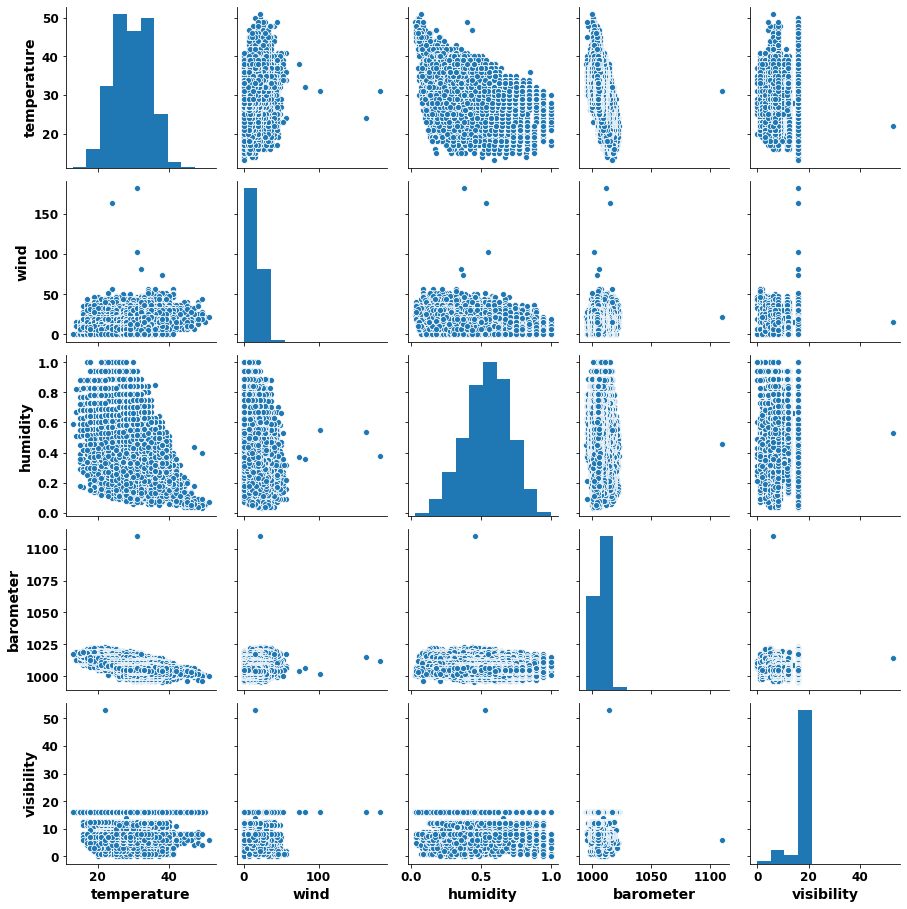

In [20]:
sns.pairplot(makkah_weather);

### 1- Pattern of Temperature Daily, Monthly and yearly (Minimum, Maximum and Average)

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


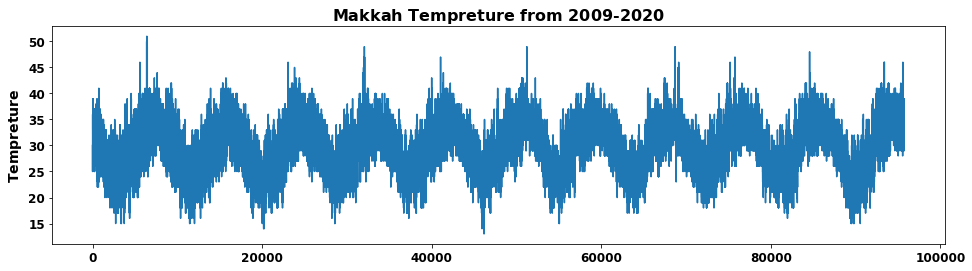

In [21]:
plot_ys(makkah_weather.temperature);
plt.title('$Makkah$ Tempreture from 2009-2020', fontsize=16);
plt.ylabel('$Tempreture$', fontsize=14);

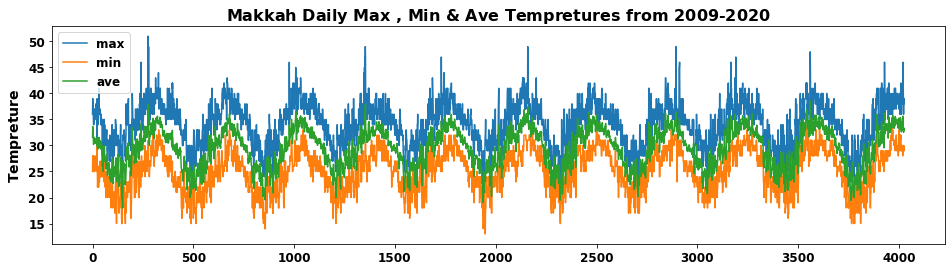

In [22]:
# Daily temp. changes
plot_ys(d_temp.reset_index()['max'], d_temp.reset_index()['min'], d_temp.reset_index()['mean'], labels=['max', 'min','ave']);
plt.title('$Makkah$ Daily Max , Min & Ave Tempretures from 2009-2020', fontsize=16);
plt.ylabel('$Tempreture$', fontsize=14);

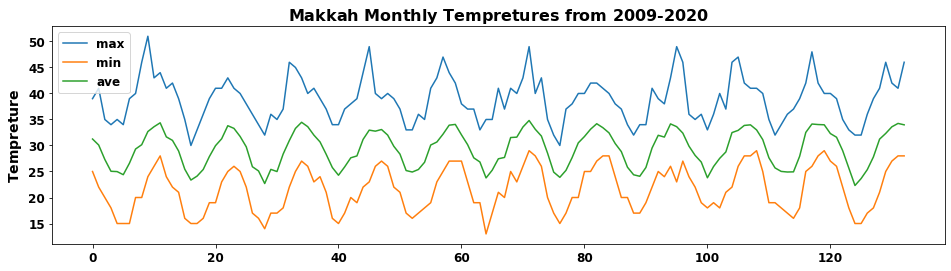

In [23]:
# Monthly temp. changes
plot_ys(m_temp.reset_index(drop=True)['max'], m_temp.reset_index(drop=True)['min'], m_temp.reset_index(drop=True)['mean'], labels=['max', 'min','ave']);
plt.title('$Makkah$ Monthly Tempretures from 2009-2020', fontsize=16);
plt.ylabel('$Tempreture$', fontsize=14);

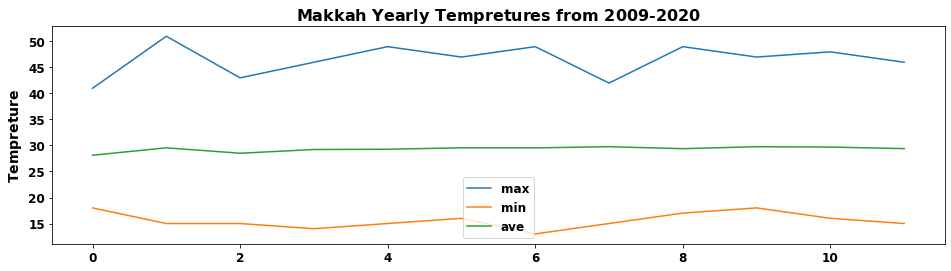

In [24]:
# Yearly temp. changes
plot_ys(y_temp.reset_index(drop=True)['max'], y_temp.reset_index(drop=True)['min'], y_temp.reset_index(drop=True)['mean'] ,labels=['max', 'min','ave']);
plt.title('$Makkah$ Yearly Tempretures from 2009-2020', fontsize=16);
plt.ylabel('$Tempreture$', fontsize=14);

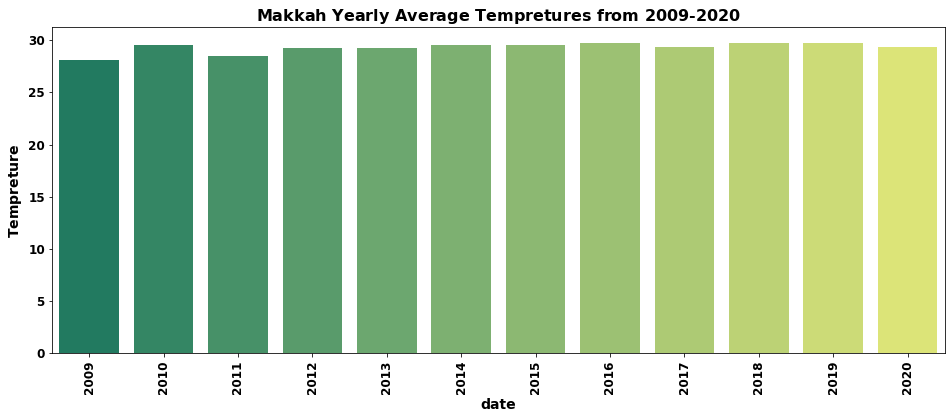

In [25]:
# # Yearly temp. changes
plt.figure(figsize=(16,6))
sns.barplot(x=y_temp.index, y=y_temp.reset_index(drop=True)['mean'],palette='summer');
plt.title('$Makkah$ Yearly Average Tempretures from 2009-2020', fontsize=16);
plt.ylabel('$Tempreture$', fontsize=14);
plt.xticks(rotation=90);

### 2- Maximum and Minimum Recorded Temperatures from 2009 to 2020 

In [26]:
mkh_df = makkah_weather.drop(['visibility',
                              'city',
                              'condition'],
                             axis=1).groupby([makkah_weather.date.dt.year,
                                             makkah_weather.date.dt.month],
                                             as_index=False).agg(['min','max','mean'])

In [27]:
print('Maximum Recorded Temperature from 2009 -2020:')
print(mkh_df['temperature']['max'][mkh_df['temperature']['max'] == mkh_df['temperature']['max'].max()])

Maximum Recorded Temperature from 2009 -2020:
date  date
2010  6       51.0
Name: max, dtype: float64


In [28]:
print('Minimum Recorded Temperature from 2009 -2020:')
print(mkh_df['temperature']['min'][mkh_df['temperature']['min'] == mkh_df['temperature']['min'].min()])

Minimum Recorded Temperature from 2009 -2020:
date  date
2015  1       13.0
Name: min, dtype: float64


### 3- Average Temperature, Wind Speed, Humidity And Barometer Each Year Grouped By Month

In [29]:
def get_mean(month, typ):
    # f1 = mkh_df.index.get_level_values(0) == 2020
    f2 = mkh_df.index.get_level_values(1) == month
    c = mkh_df.iloc[(f2)]

    look_up = {'1': 'January', '2': 'February ', '3': 'March', '4': 'April ', '5': 'May',
                '6': 'June', '7': 'July', '8': 'August ', '9': 'September',
               '10': 'October ', '11': 'November ', '12': 'December'}

    nam = look_up[str(month)]
    # d = pd.melt(c['temperature'], value_vars=['mean'])
    # d = d.rename(columns={'value': 'Temperature'})

    c['year'] = np.tile(c.index.get_level_values(0), 1)
    plt.figure(figsize=(16,6));
    aa = sns.barplot(data=c, x='year',y=c[typ]['mean'].values, palette='summer_r');
    
    sns.set_style("white");
    
    plt.title('$Average$ {} for {} from 2009-2020'.format(typ,nam));
    plt.ylabel(typ);
    
    if typ == 'temperature':
        plt.ylim(0, max(c[typ]['mean'].values)+4);
        show_values_on_bars(aa, h_v="v", space=1)
    elif typ == 'humidity':
        plt.ylim(0, max(c[typ]['mean'].values)+1);
        show_values_on_bars(aa, h_v="v", space=0.2)
    elif typ == 'barometer':
        plt.ylim(0, max(c[typ]['mean'].values)+110);
        show_values_on_bars(aa, h_v="v", space=10)
    else:
        plt.ylim(0, max(c[typ]['mean'].values)+2);
        show_values_on_bars(aa, h_v="v", space=1)
    
    plt.figure(figsize=(16,6));
    dum = c[typ]['mean'].values - c[typ]['mean'].values.mean() 
    aa = sns.barplot(data=c, x='year',y= dum, palette='summer_r');
    
    
    plt.title('$Average$ {} After Removing the Mean for {} from 2009-2020'.format(typ,nam)); 
    
    if typ == 'temperature':
        plt.ylim(min(dum)-1, max(dum)+1);
        show_values_on_bars(aa, h_v="v", space=0.3)
    elif typ == 'humidity':
        plt.ylim(min(dum)-0.5, max(dum)+0.5);
        show_values_on_bars(aa, h_v="v", space=0.1)
    else:
        plt.ylim(min(dum)-1, max(dum)+1);
        show_values_on_bars(aa, h_v="v", space=0.3)

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


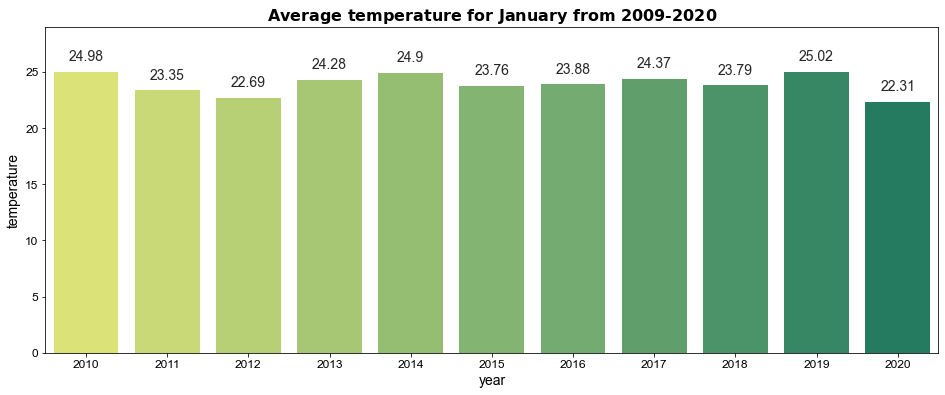

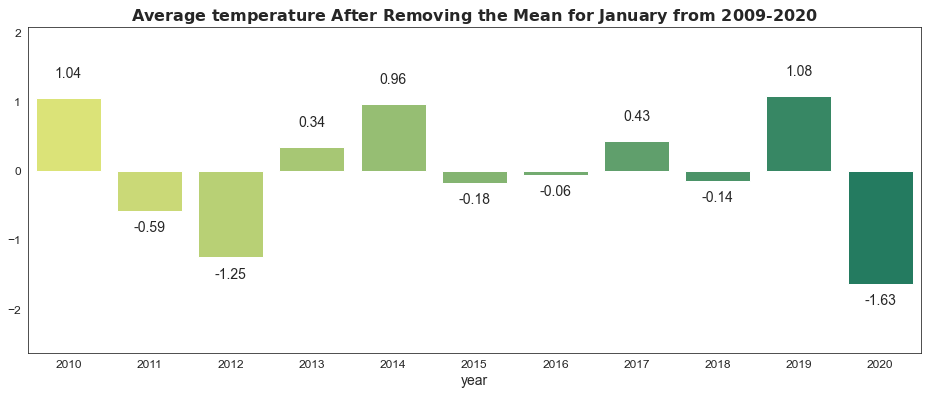

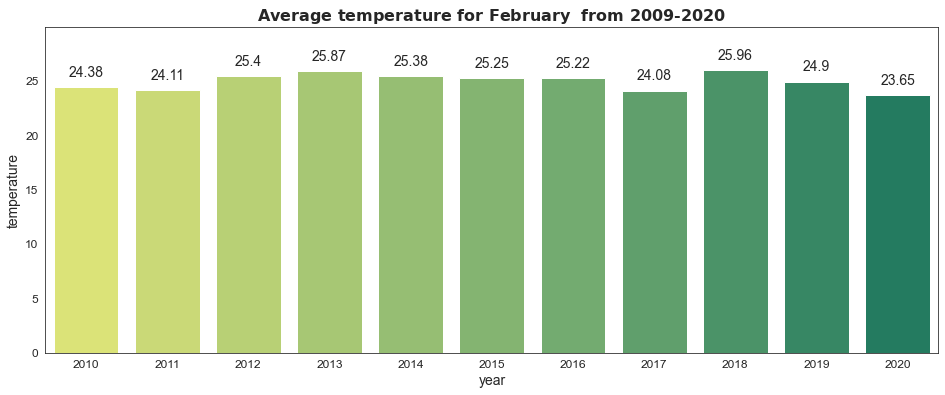

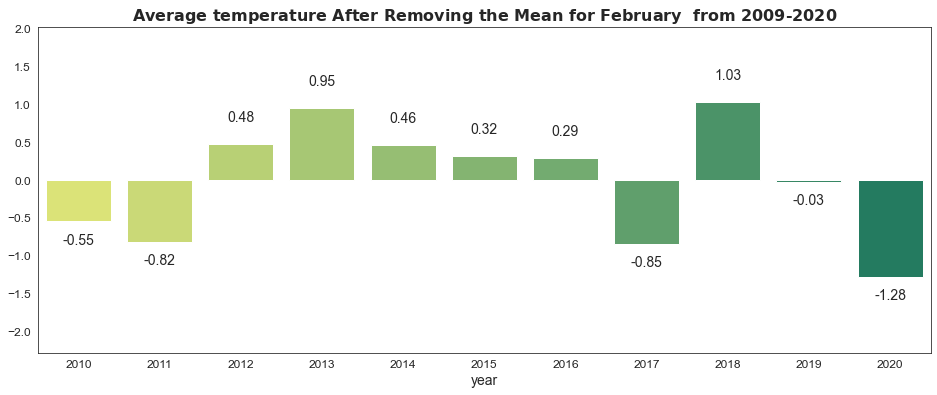

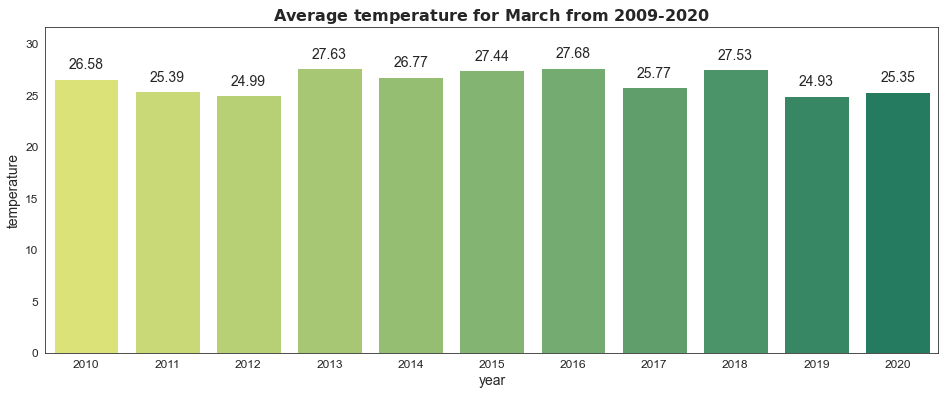

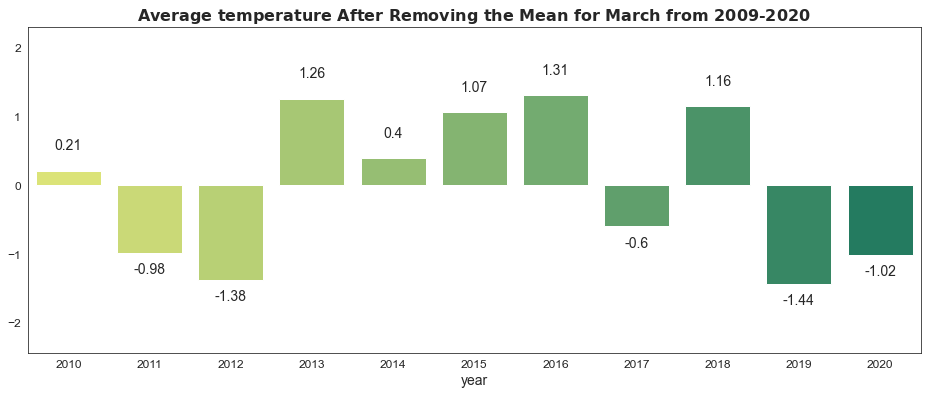

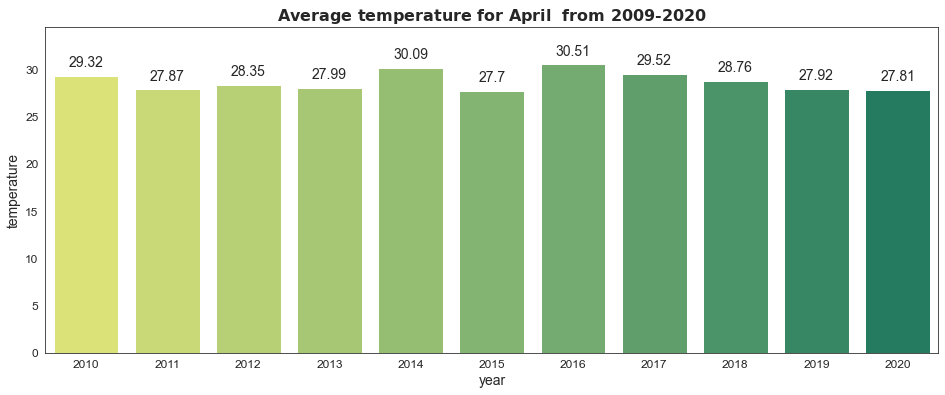

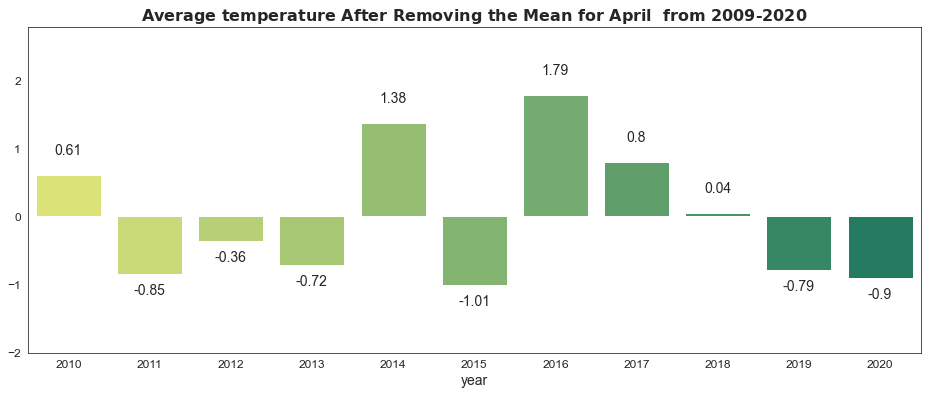

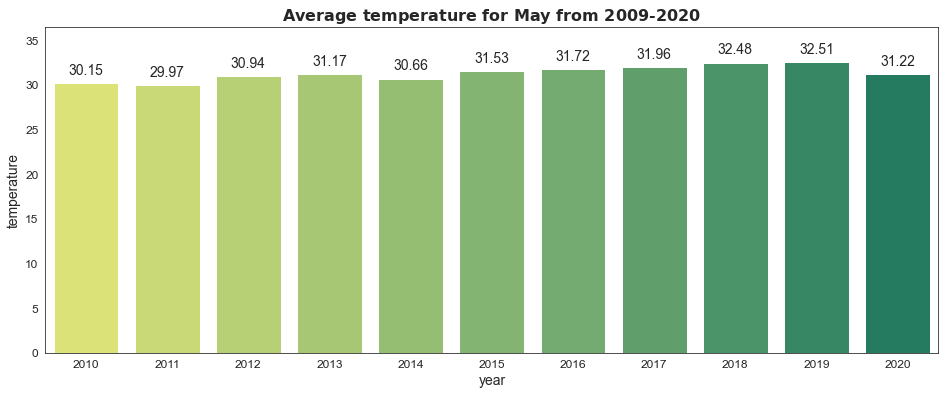

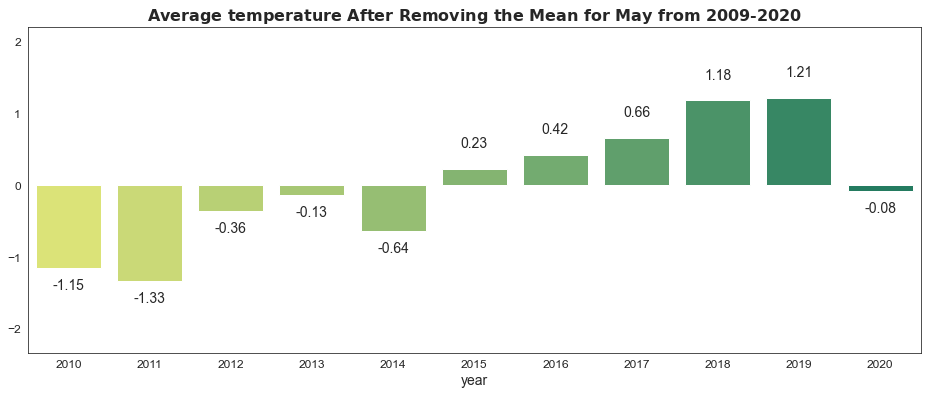

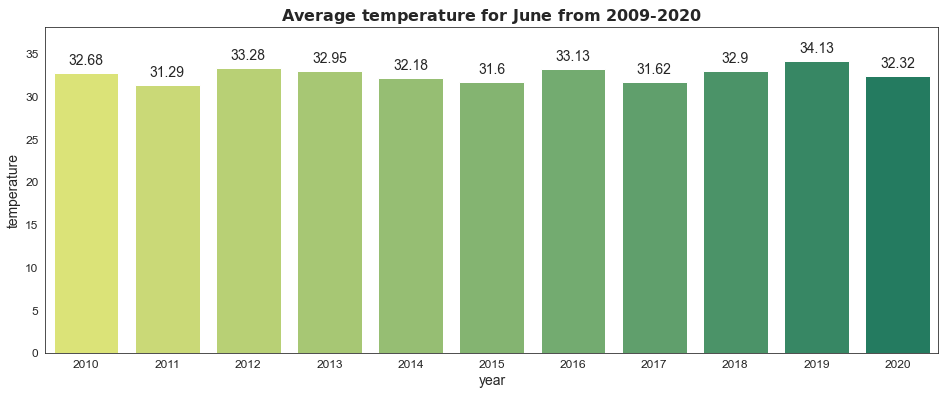

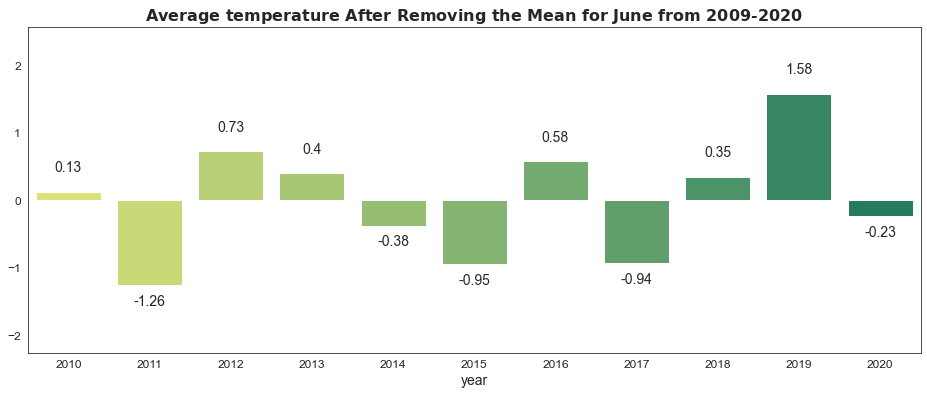

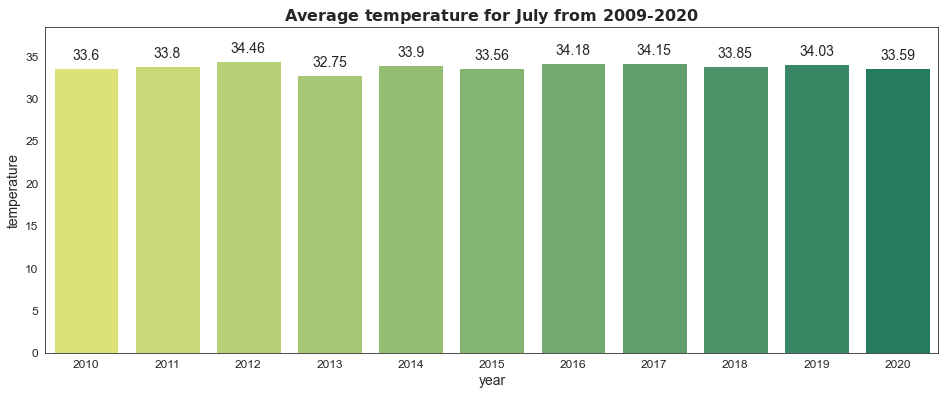

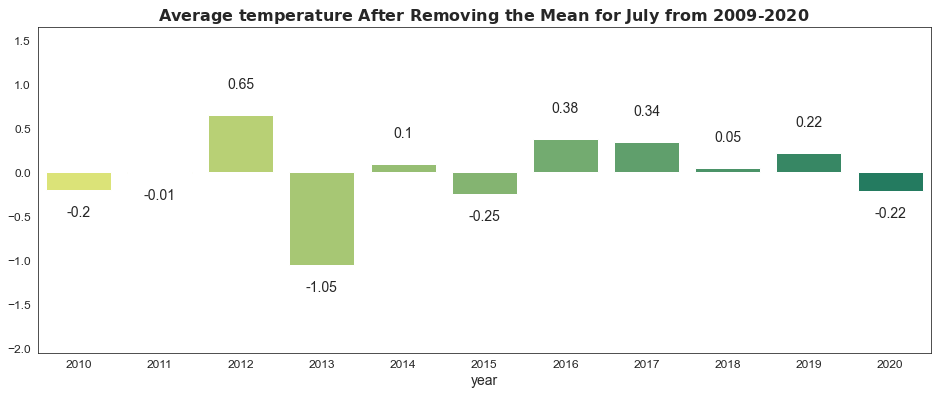

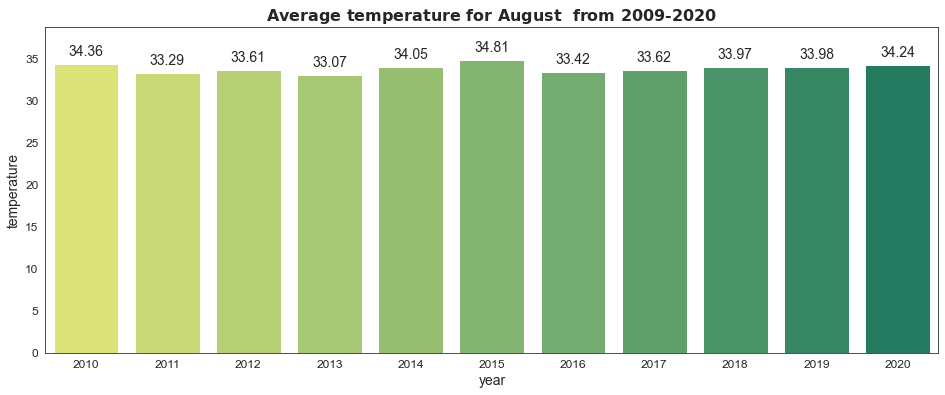

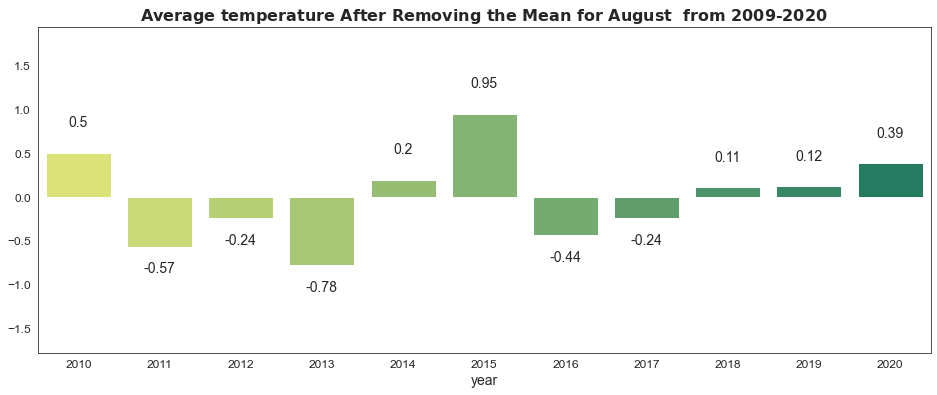

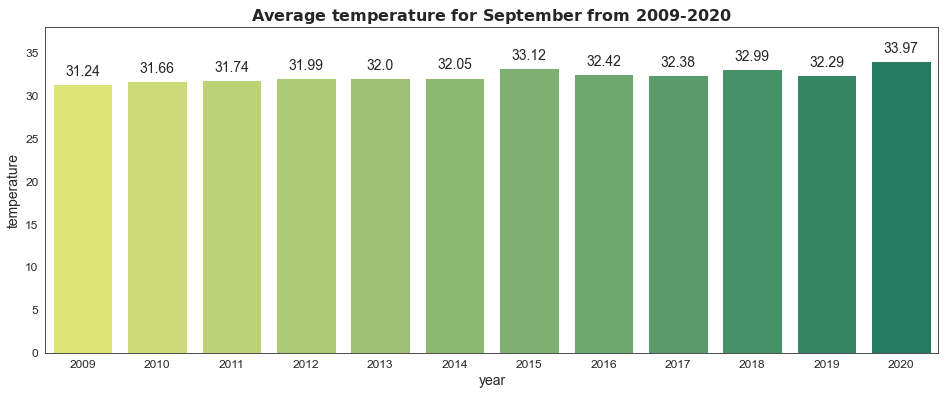

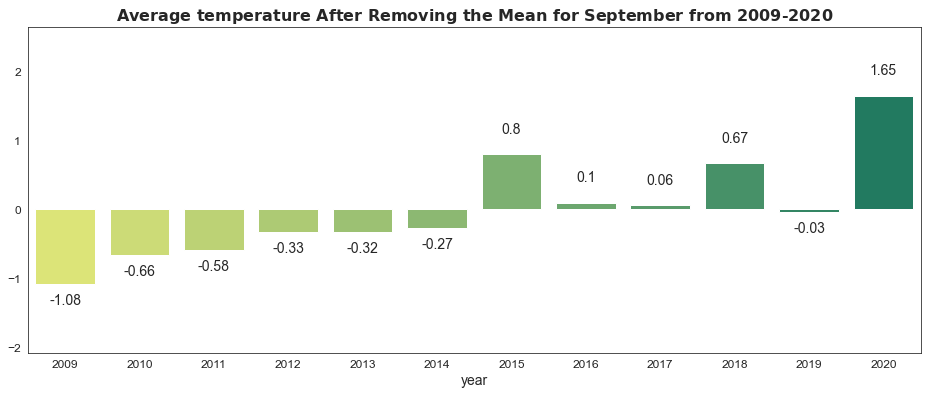

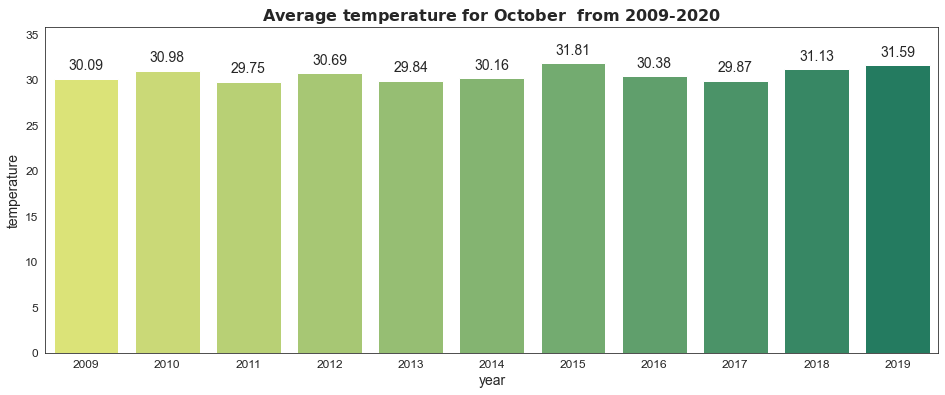

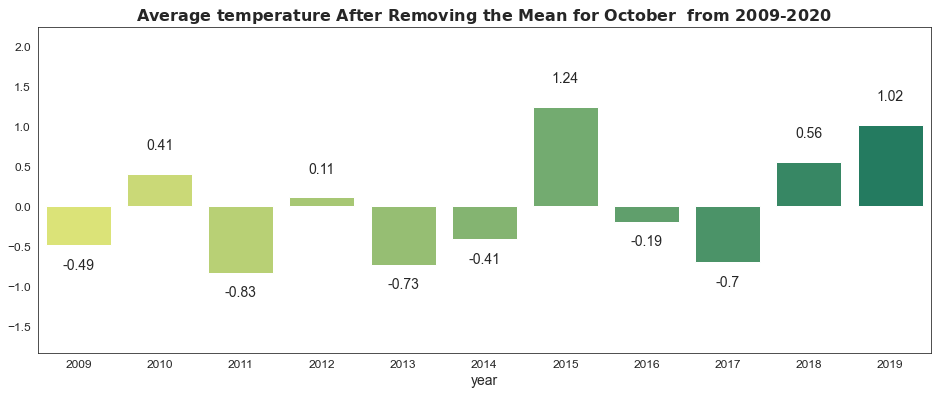

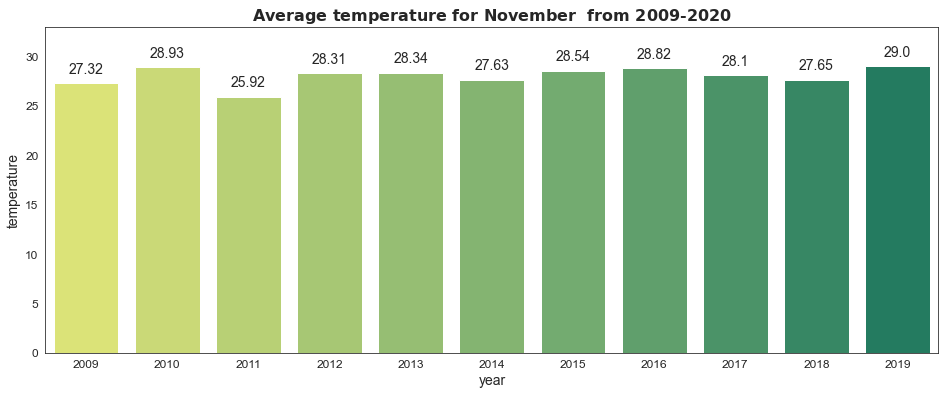

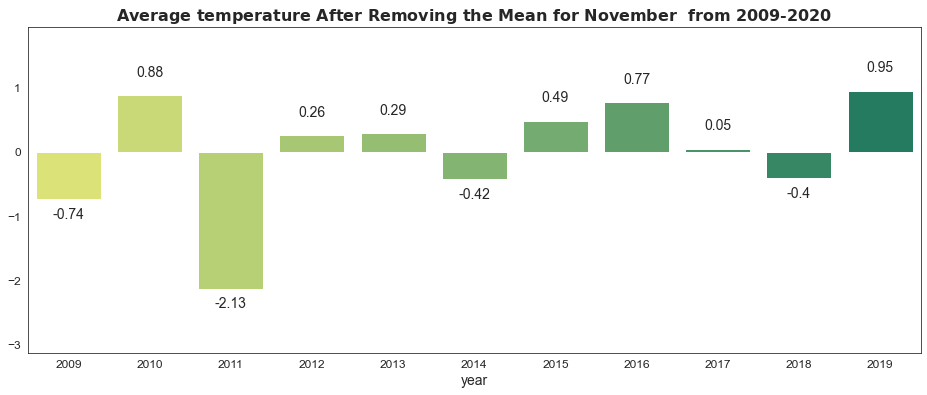

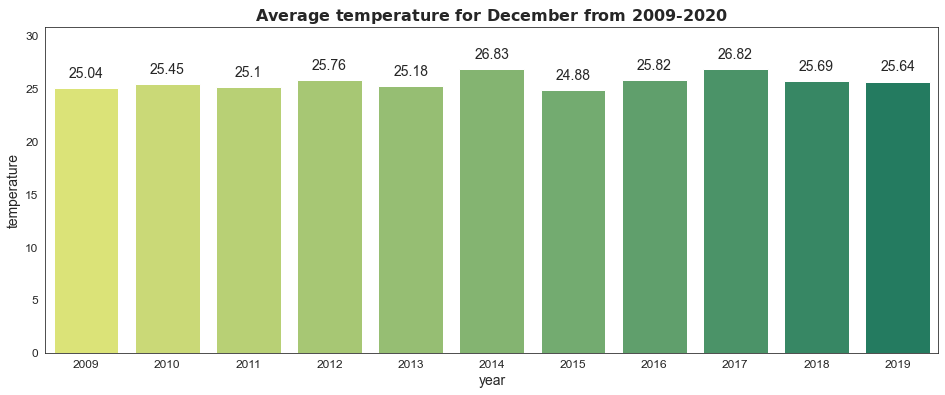

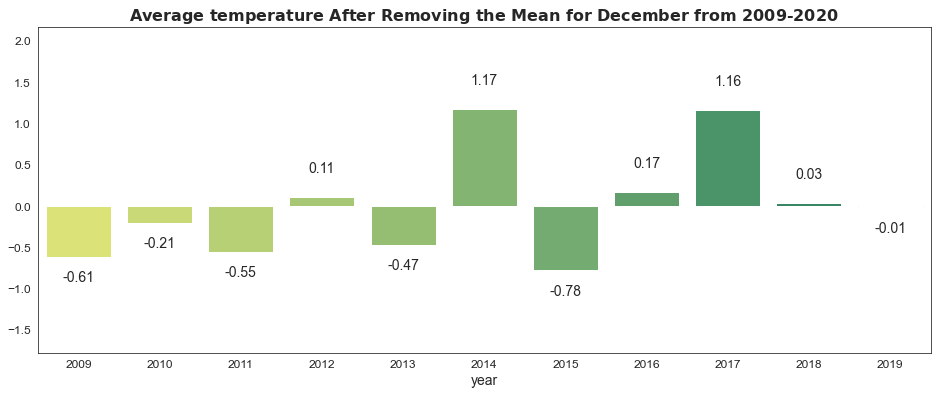

In [30]:
for m in range(1,13):
    get_mean(m, 'temperature')

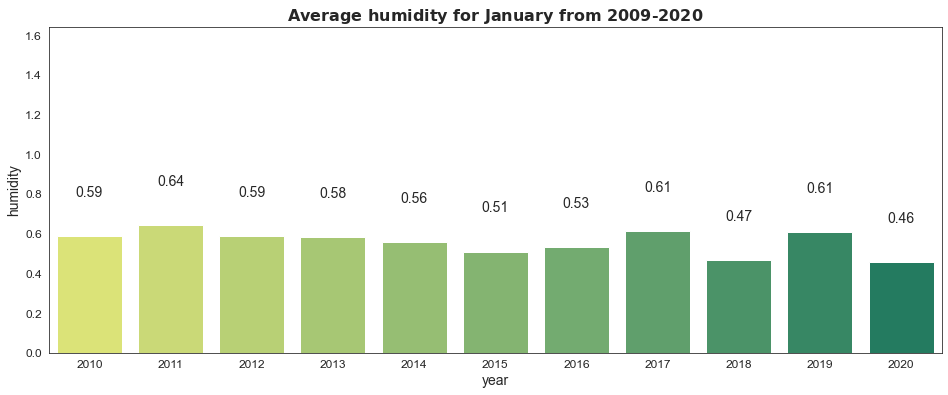

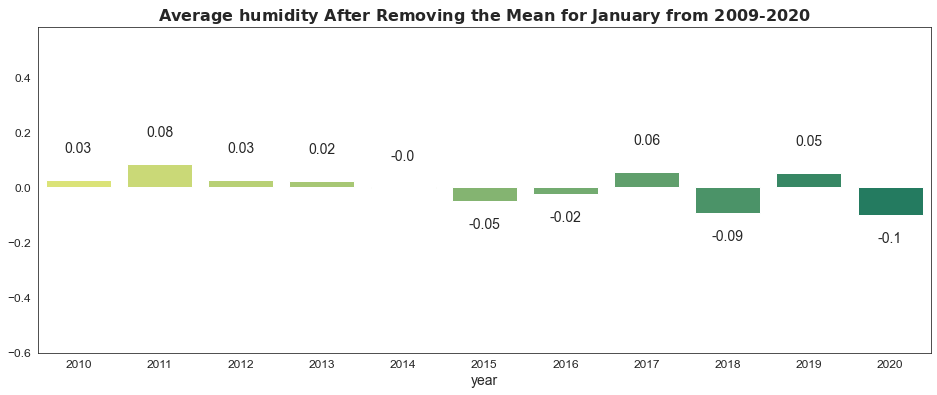

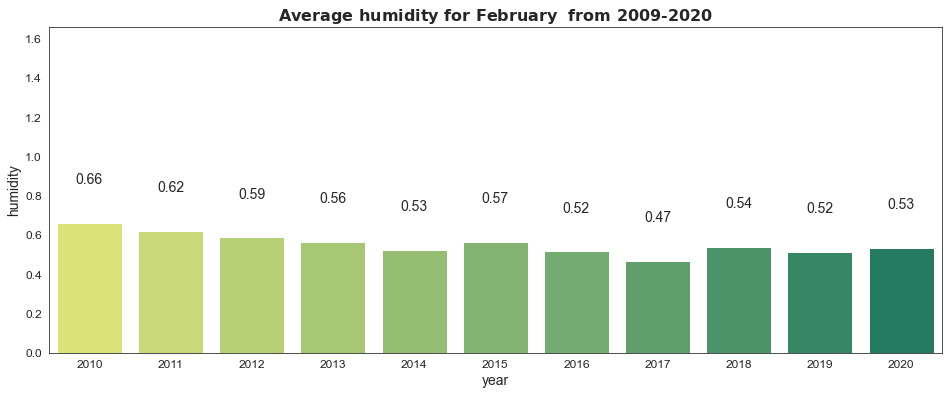

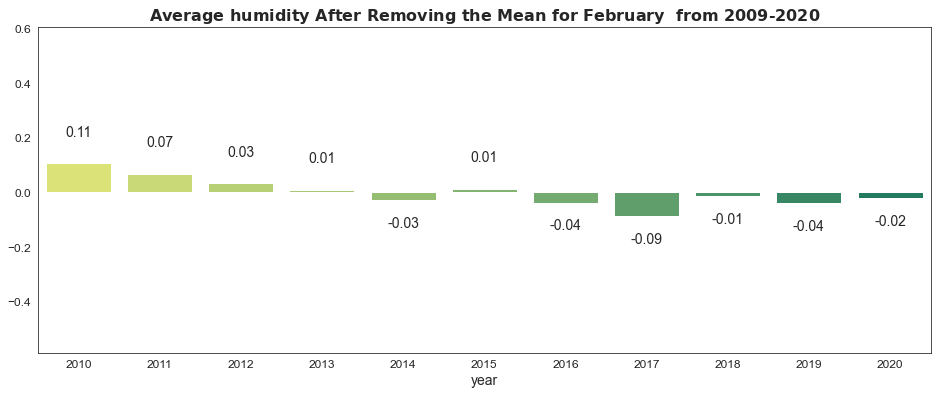

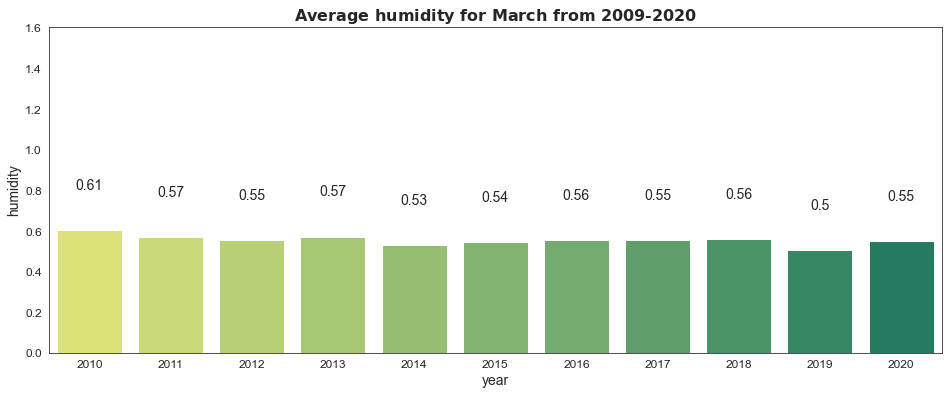

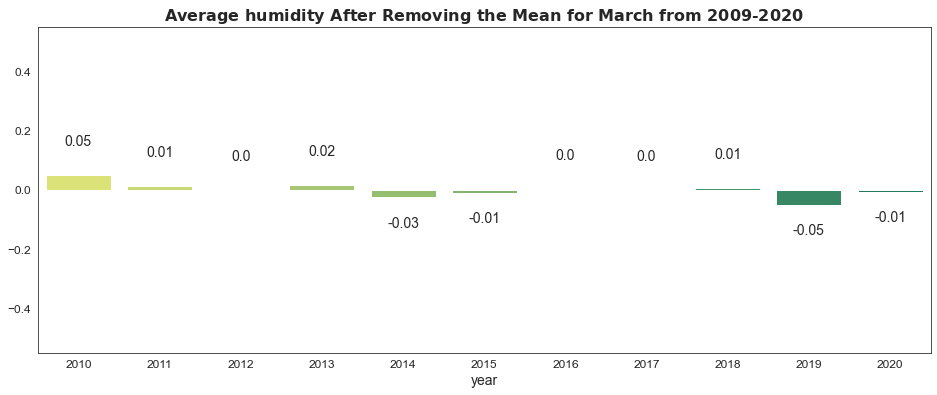

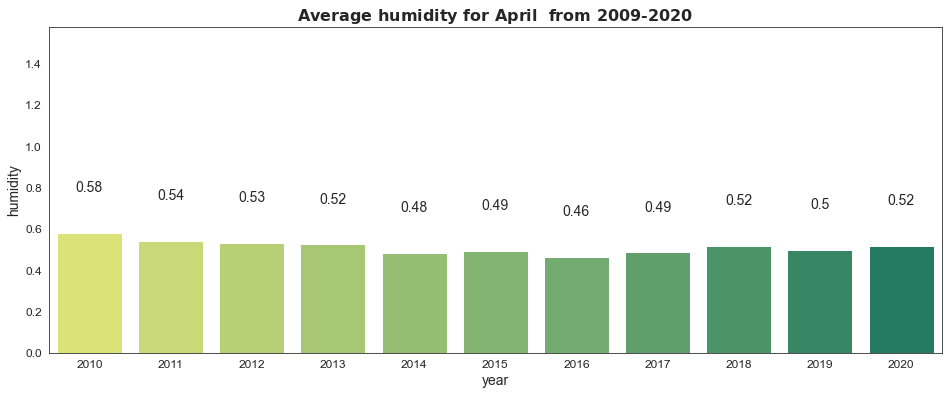

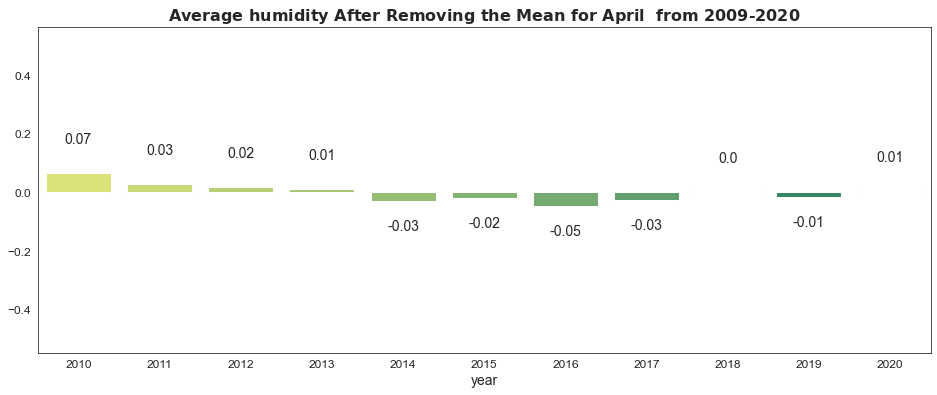

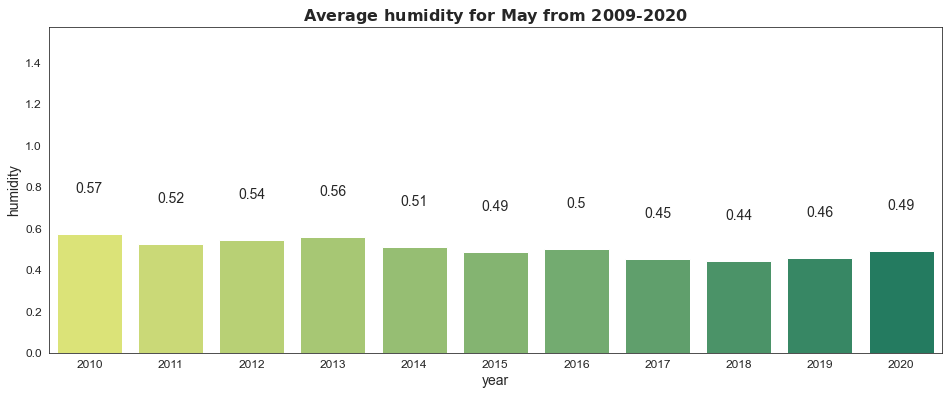

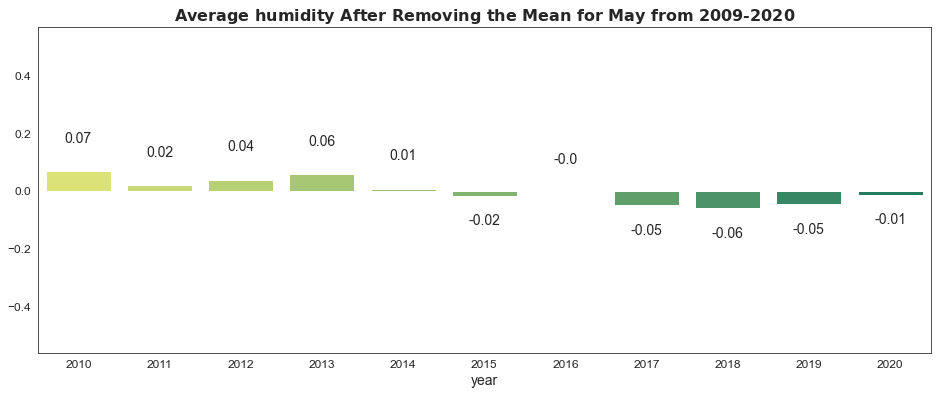

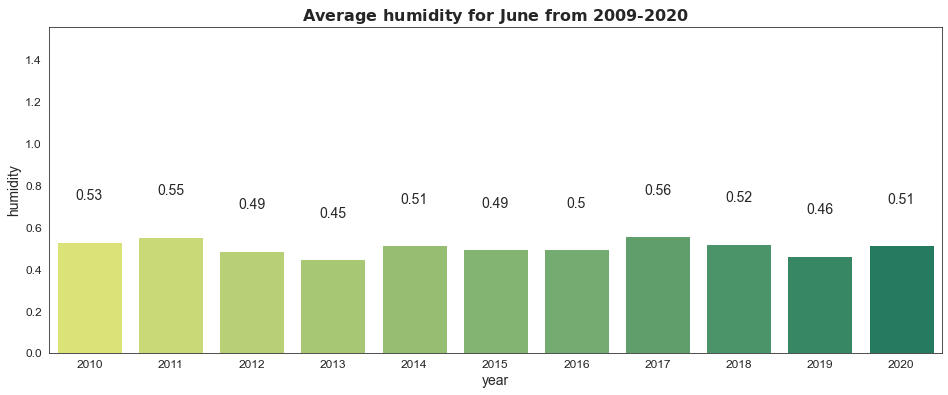

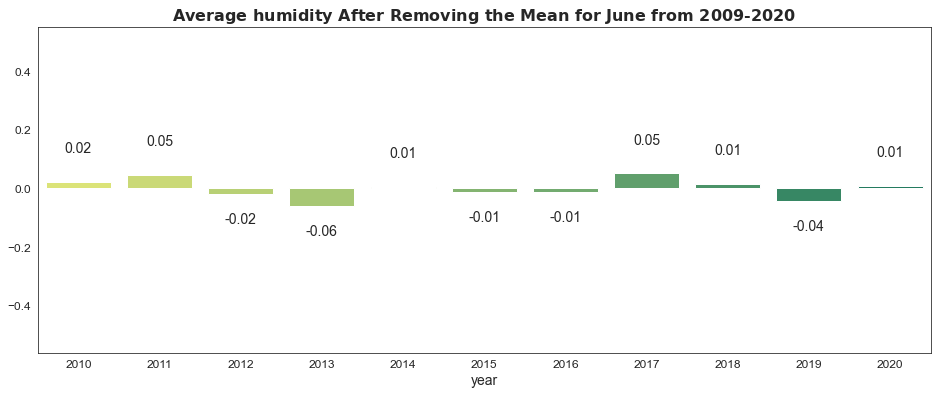

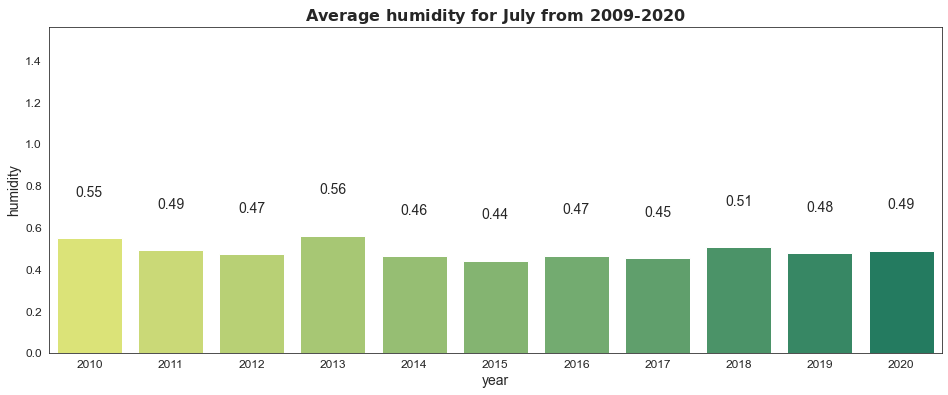

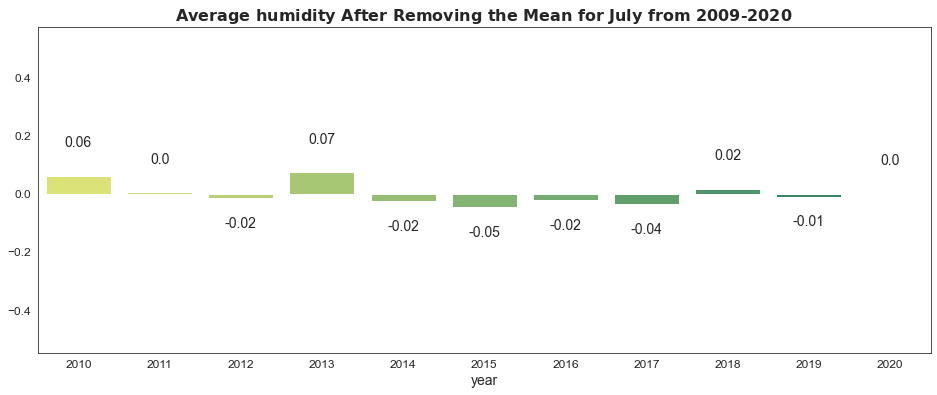

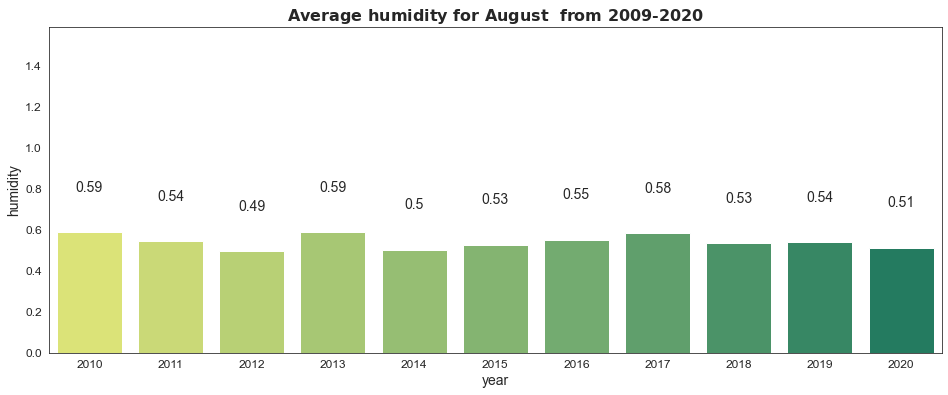

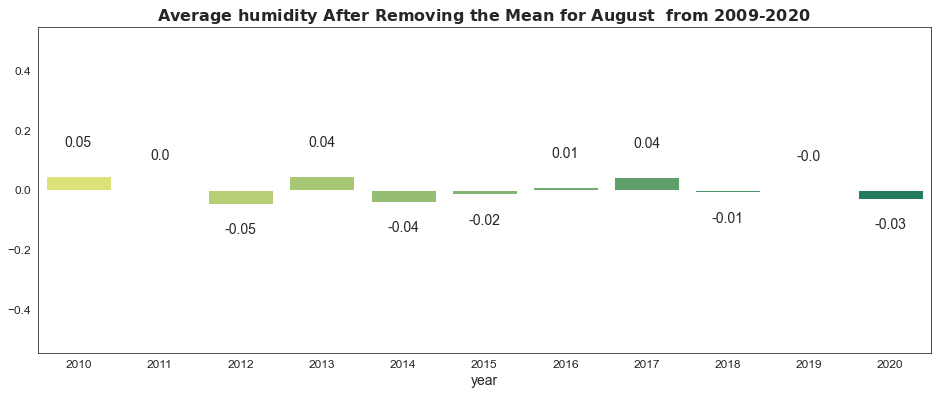

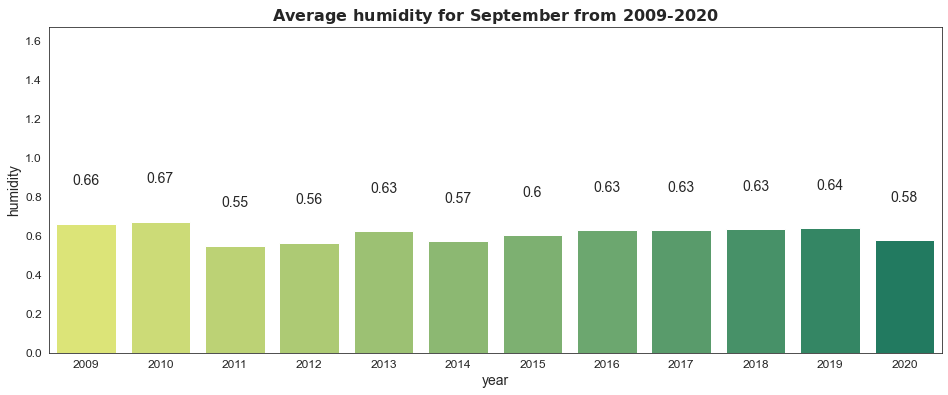

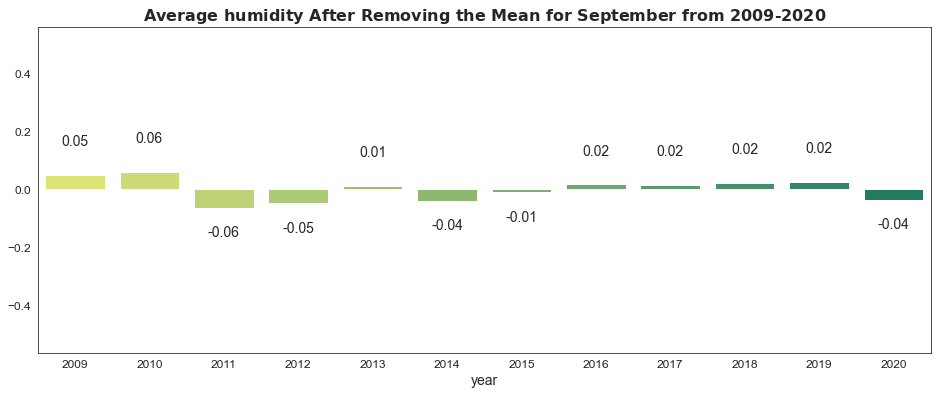

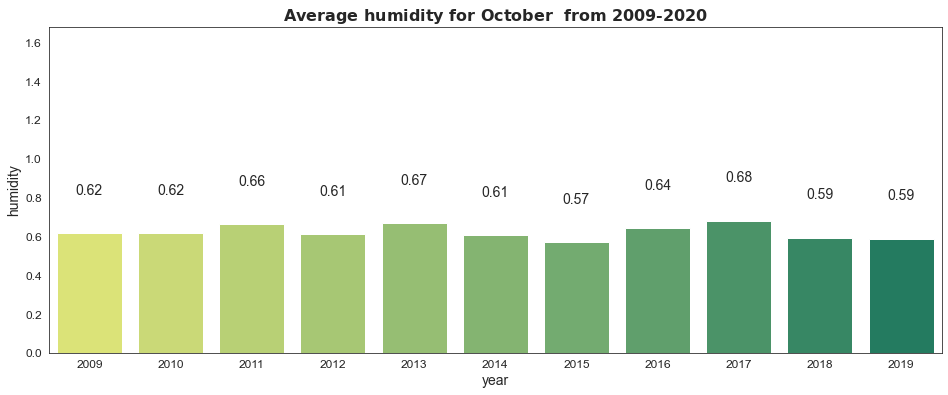

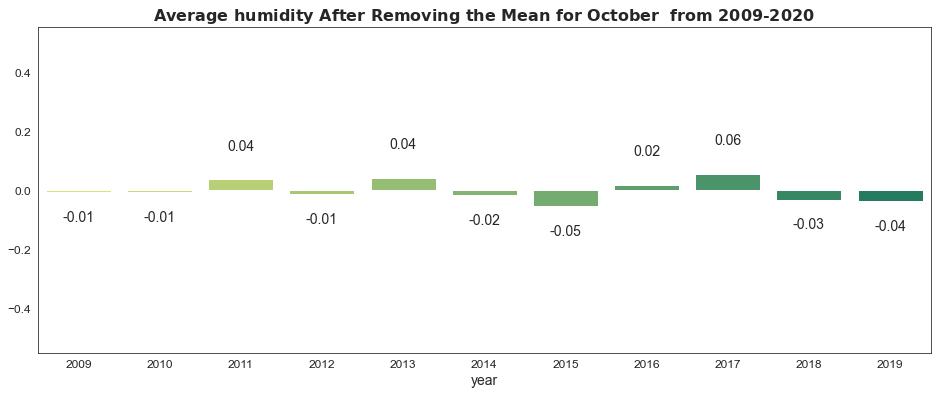

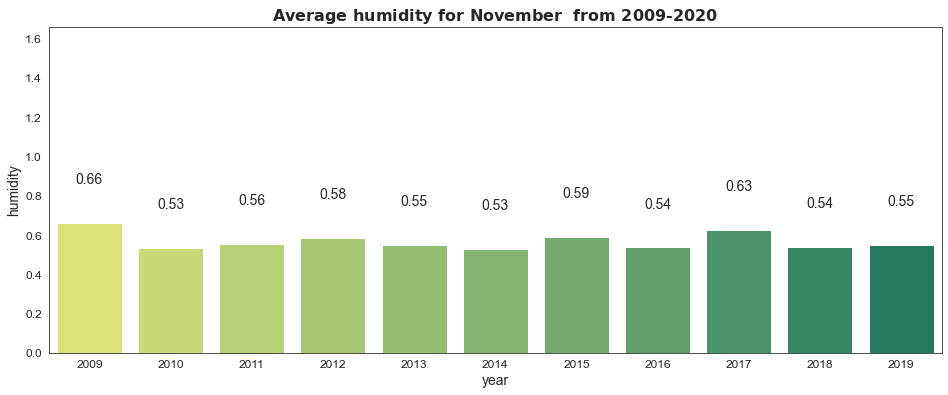

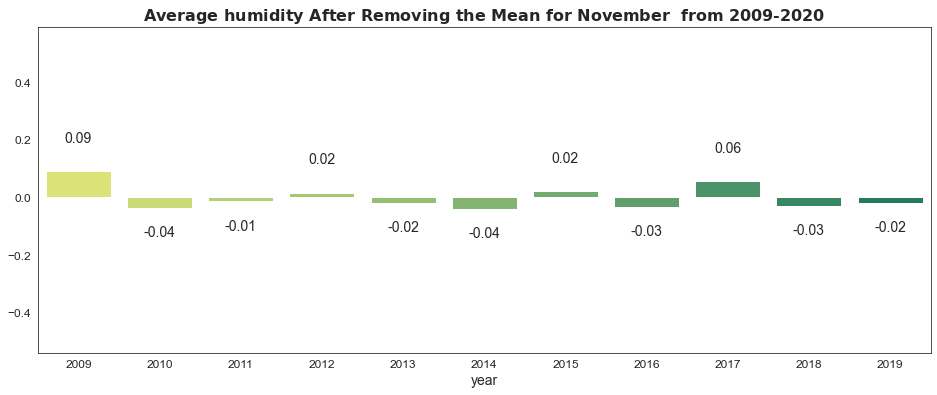

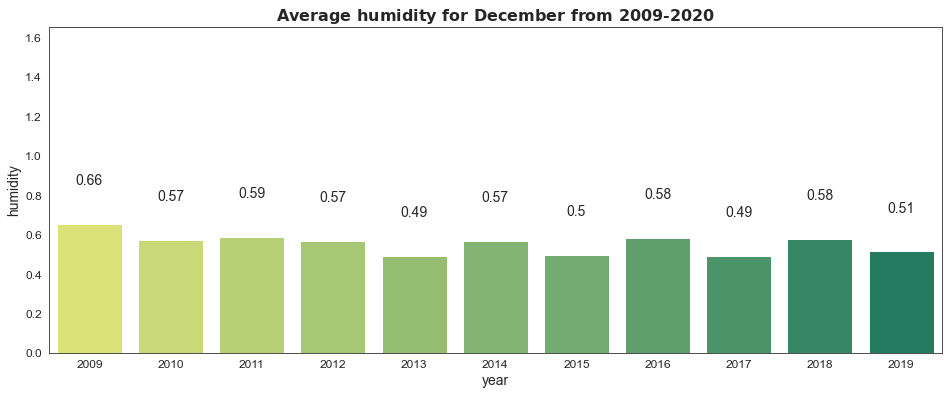

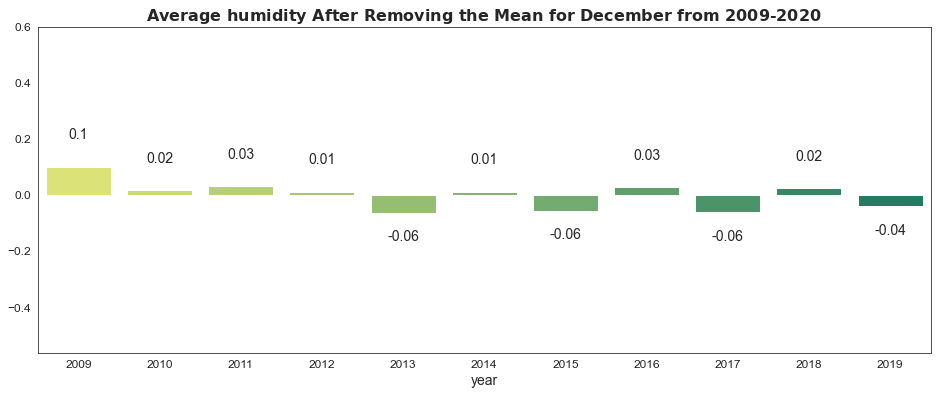

In [31]:
for m in range(1,13):
    get_mean(m, 'humidity')

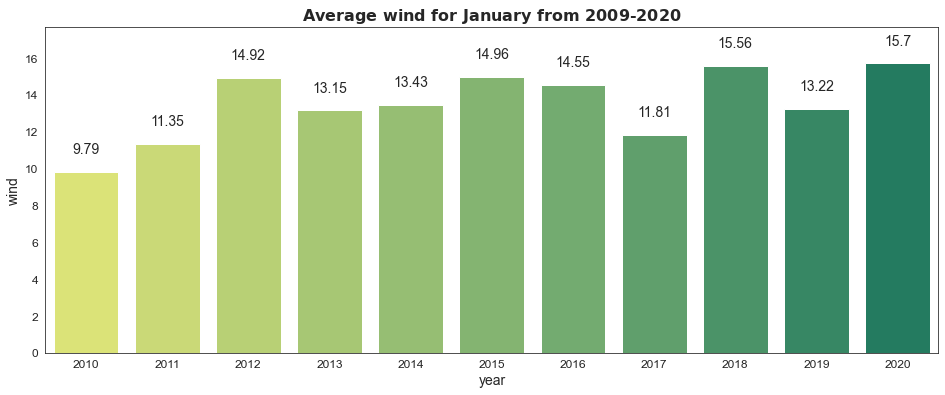

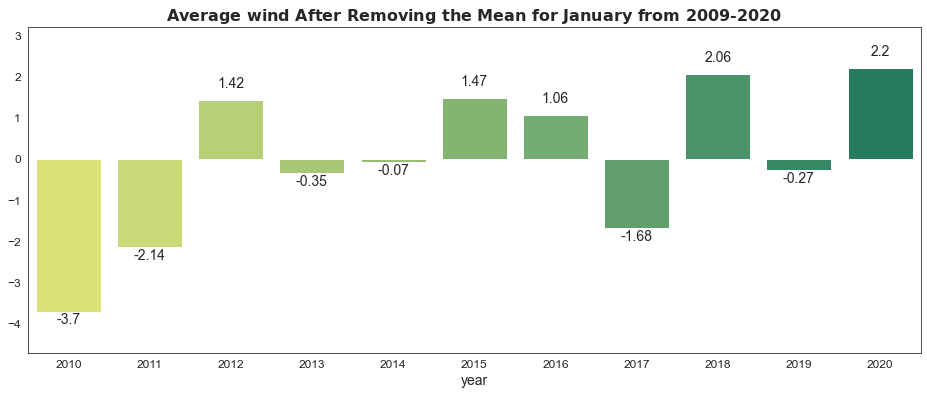

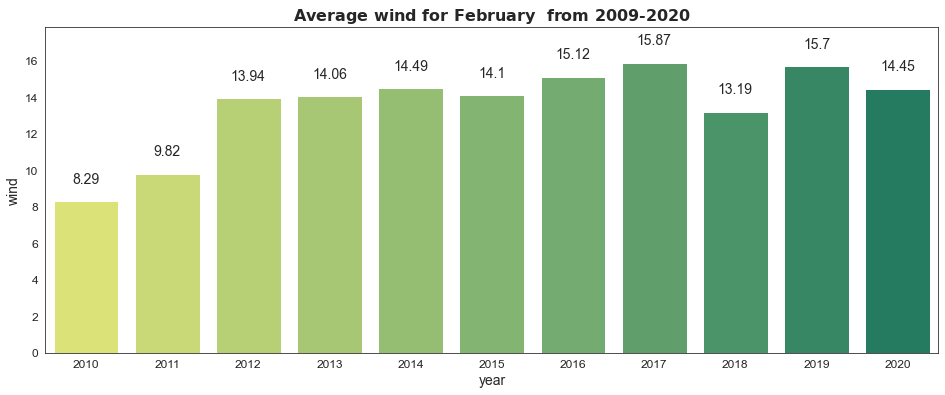

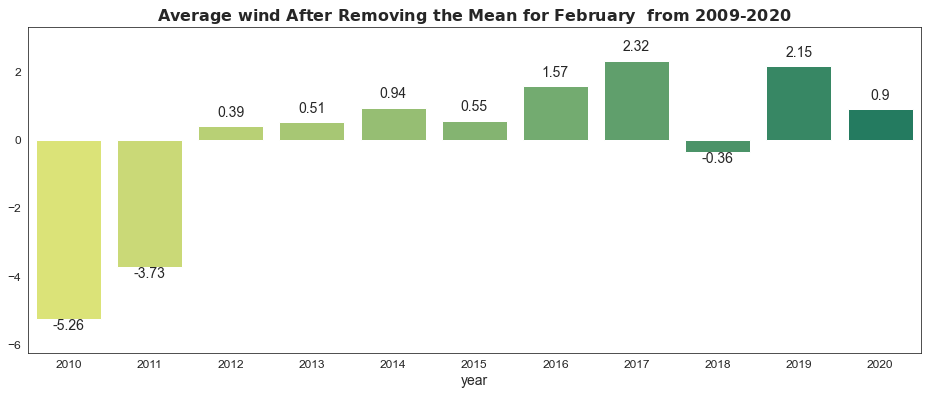

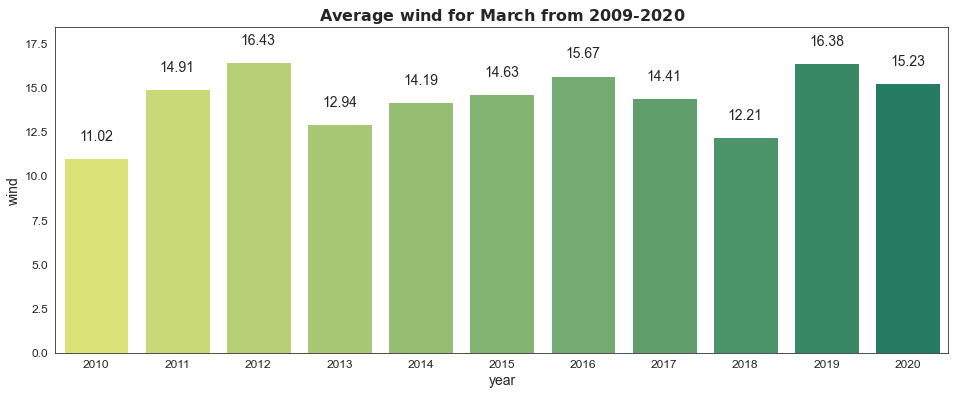

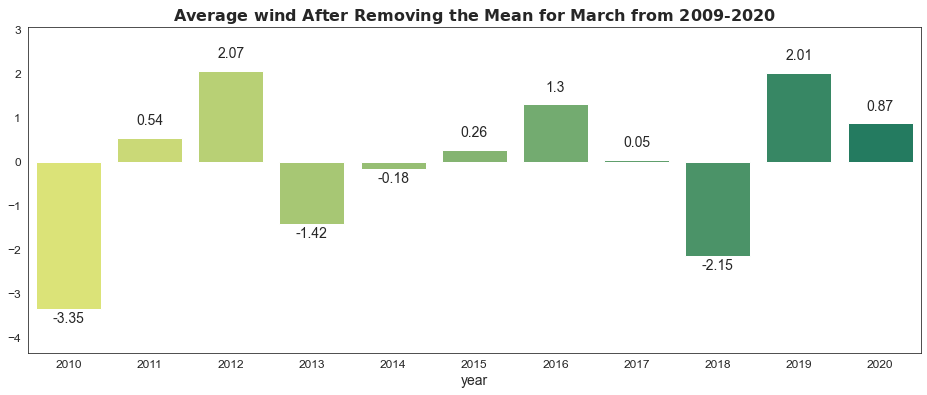

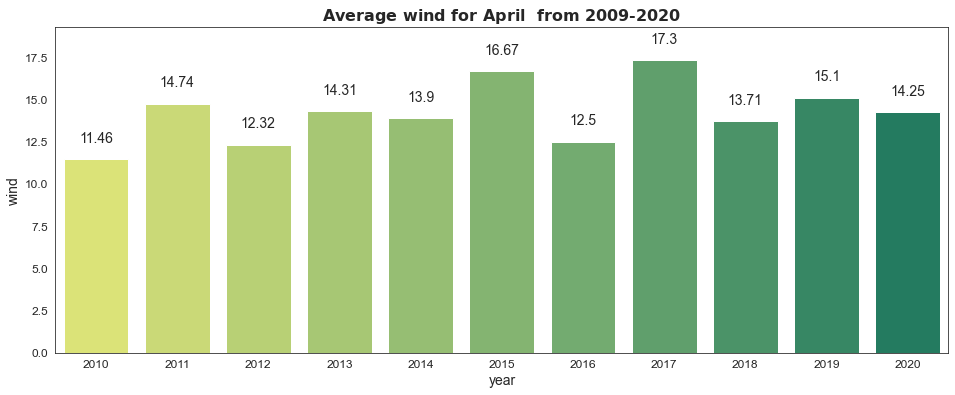

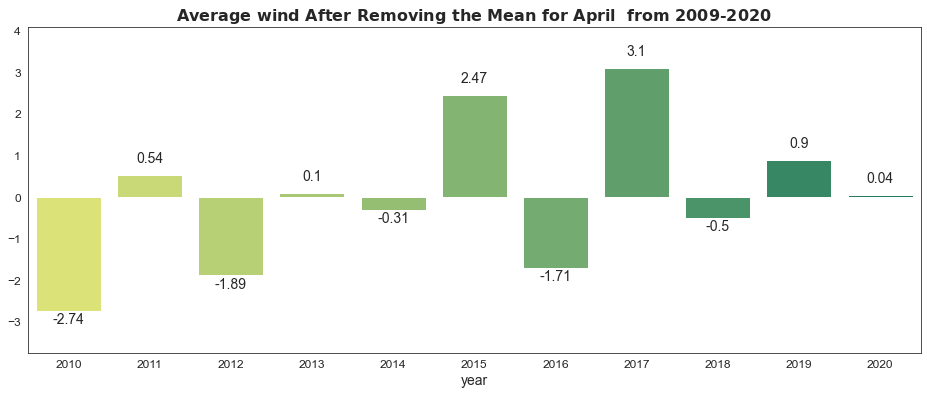

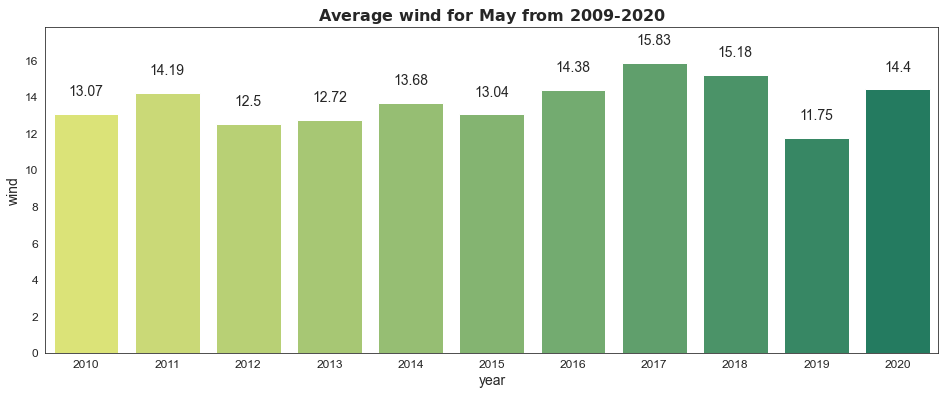

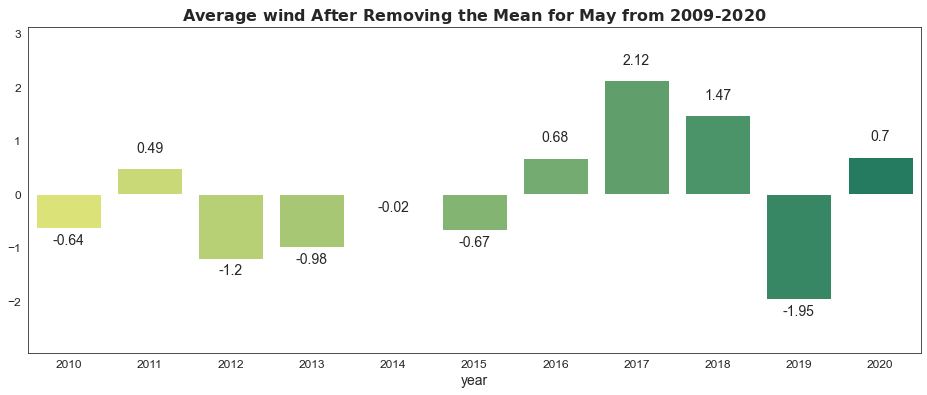

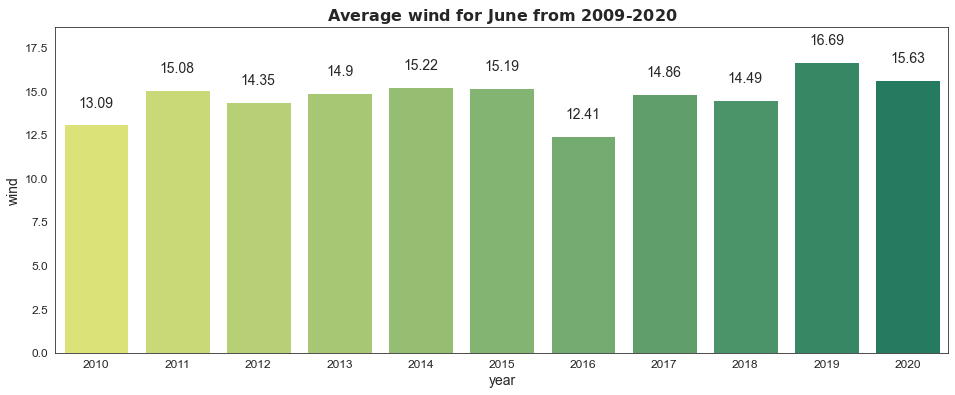

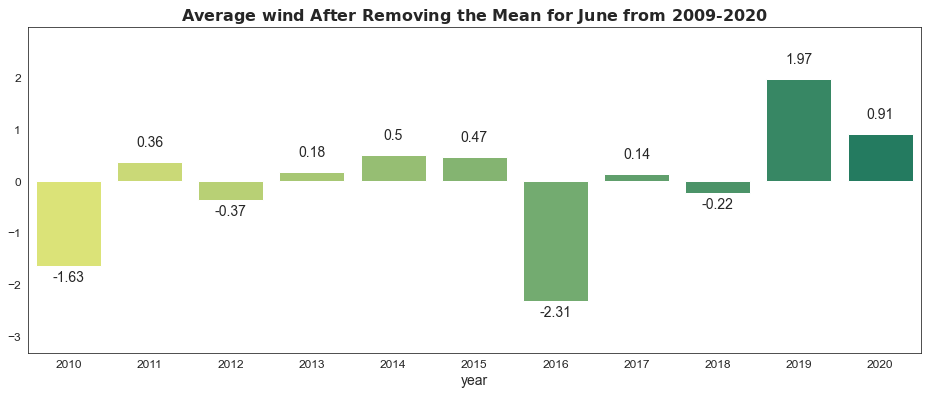

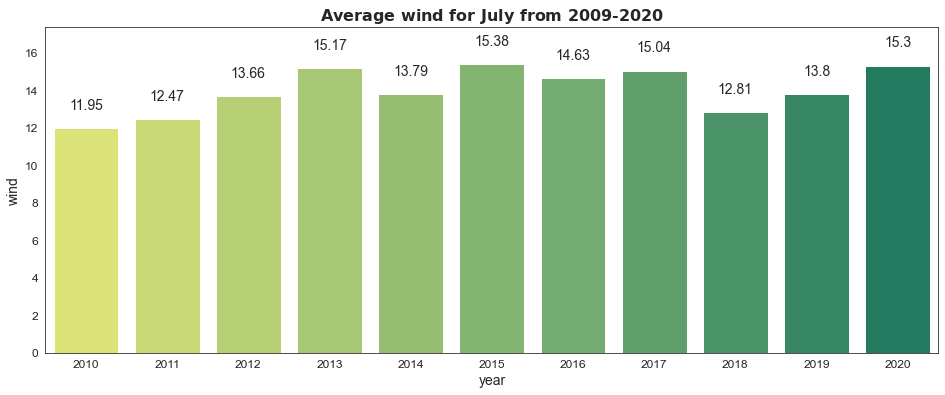

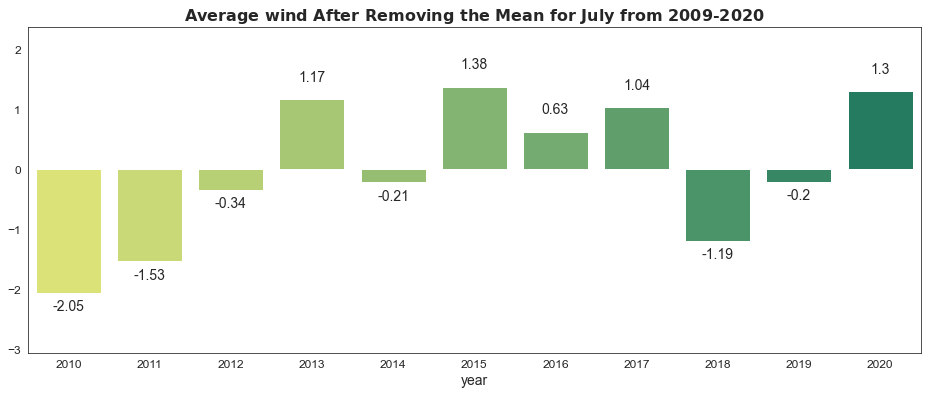

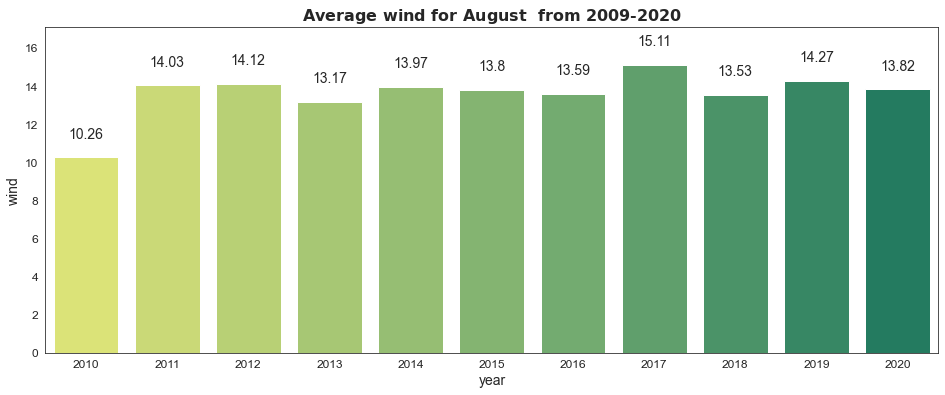

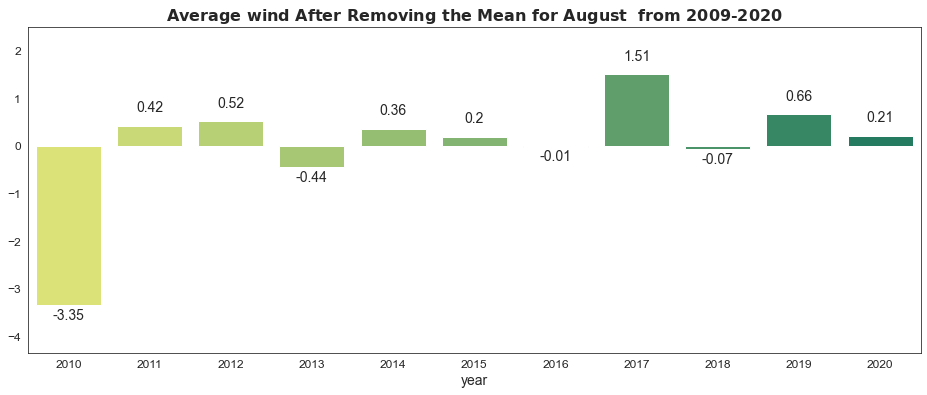

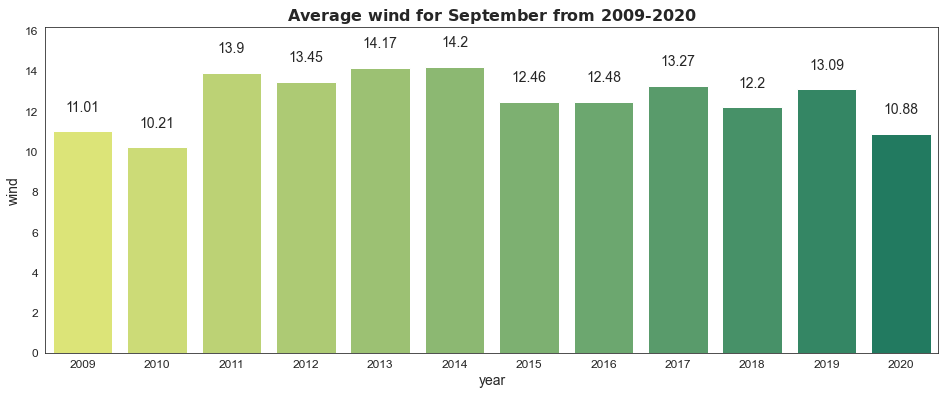

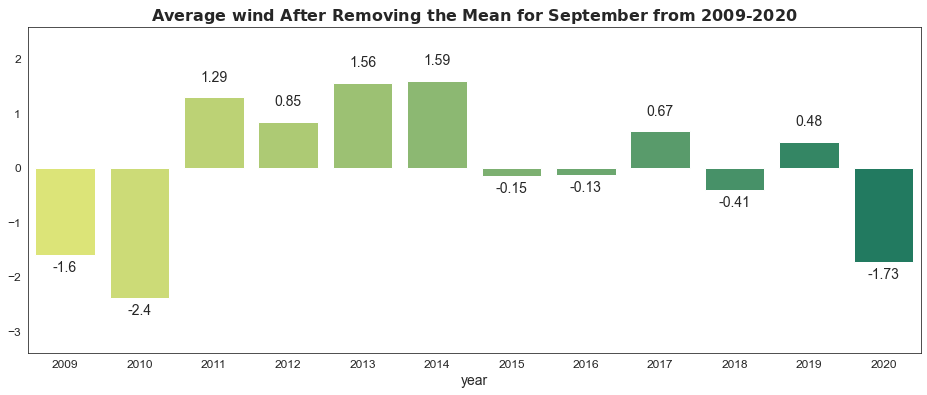

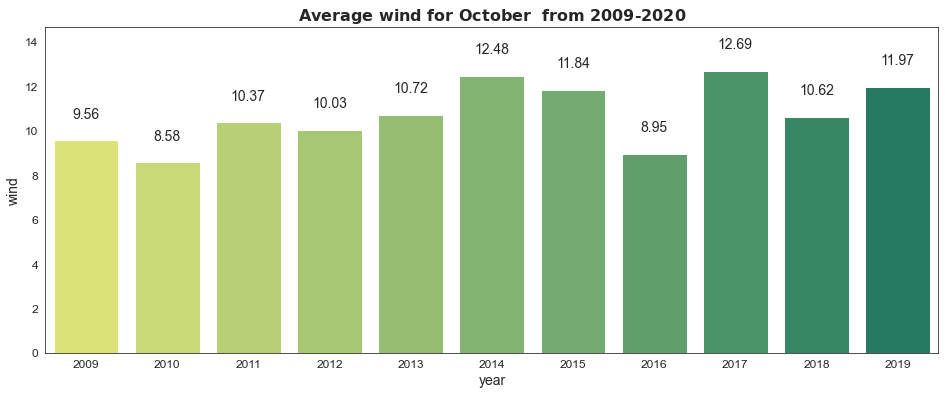

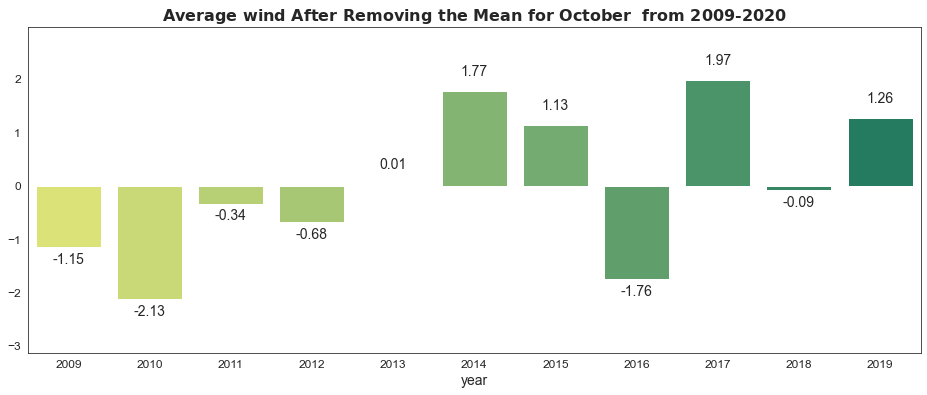

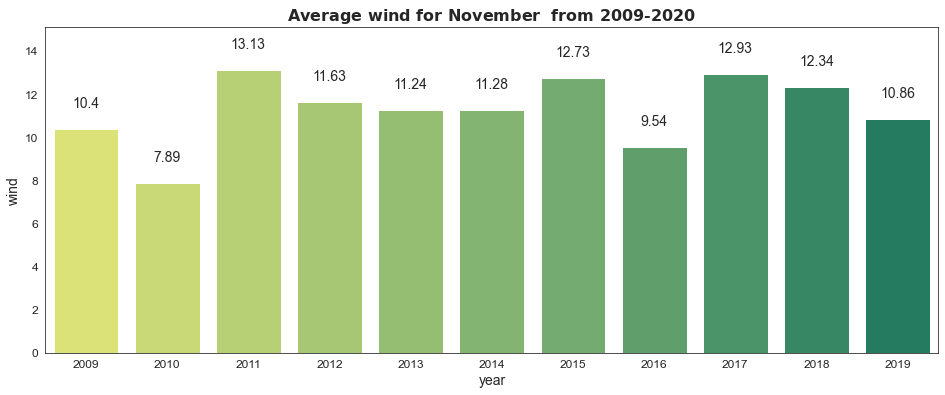

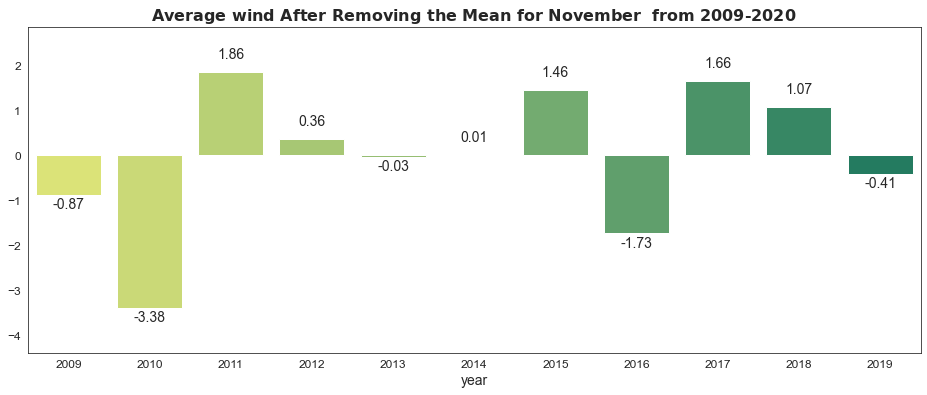

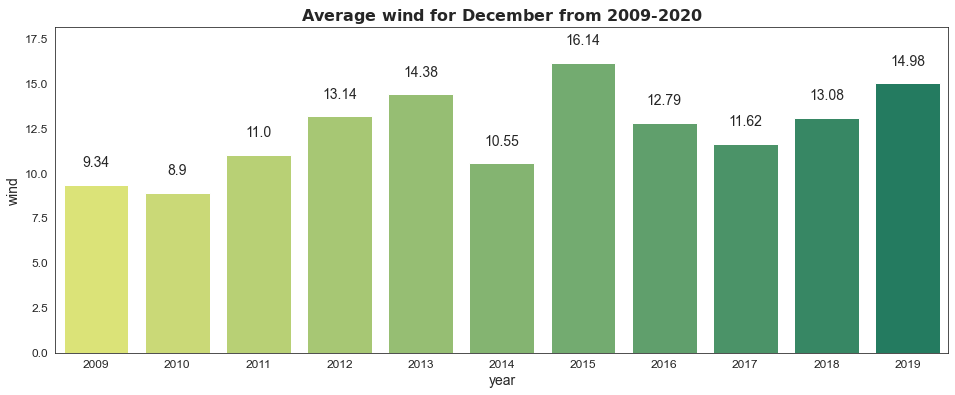

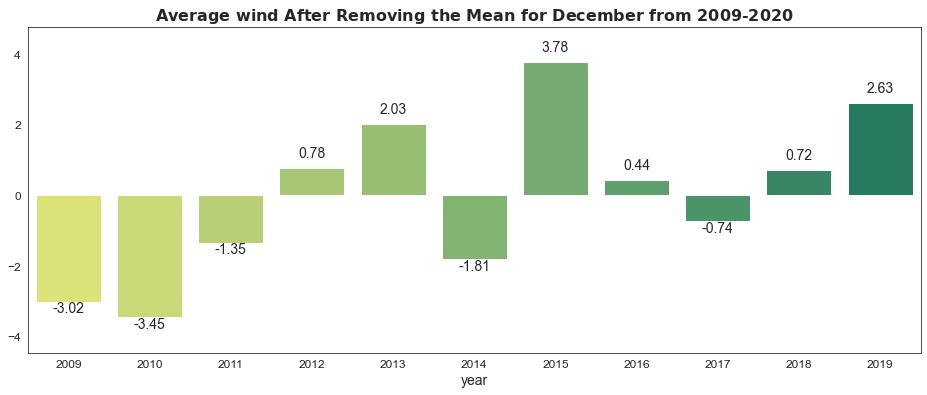

In [32]:
for m in range(1,13):
    get_mean(m, 'wind')

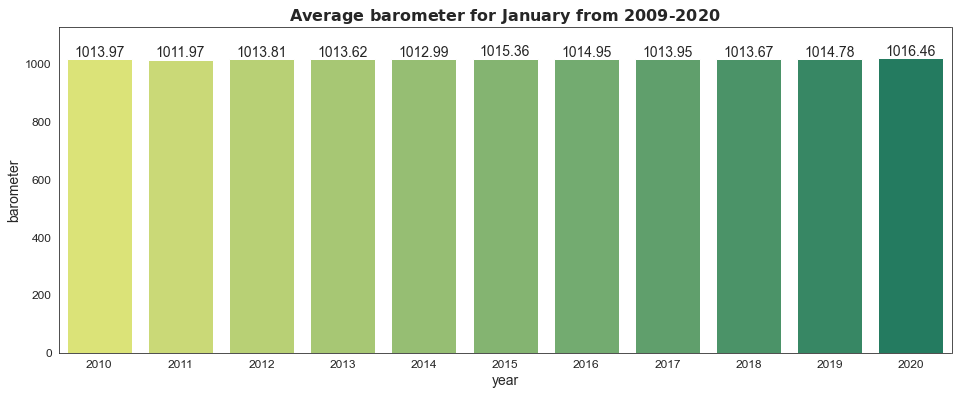

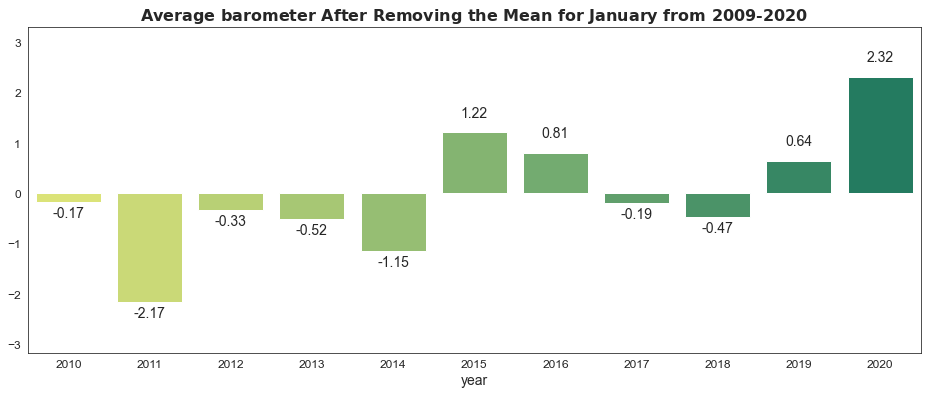

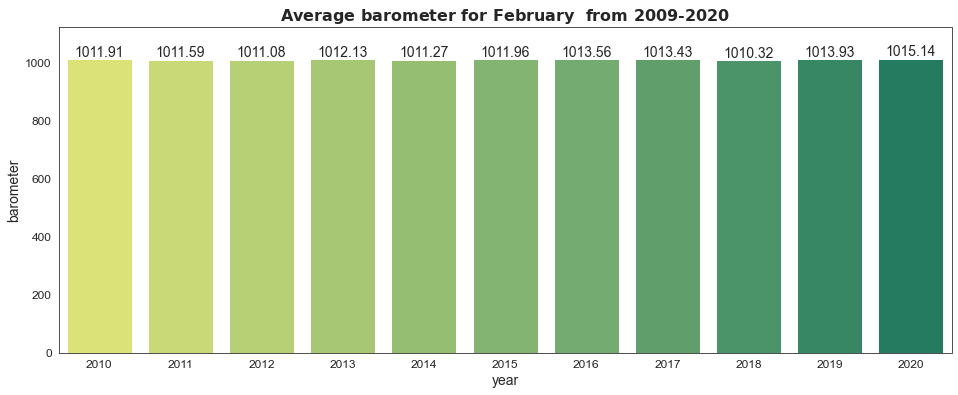

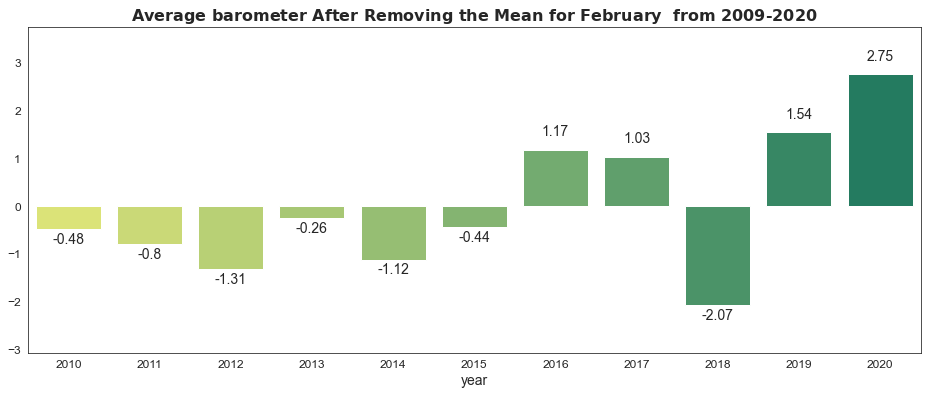

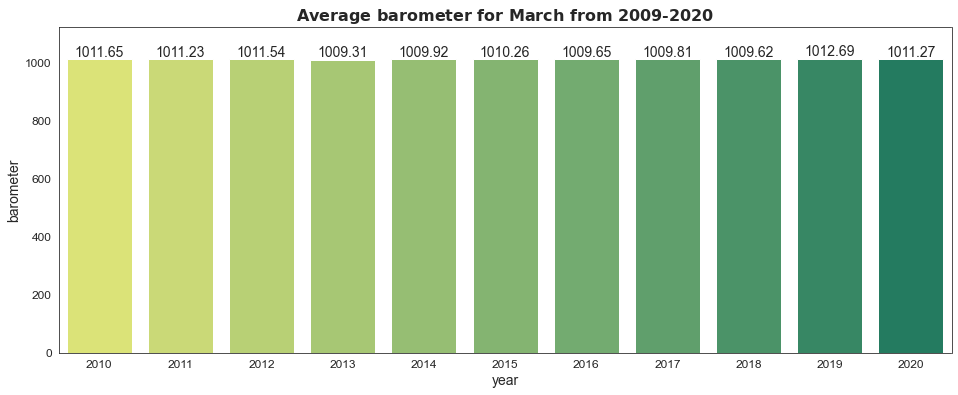

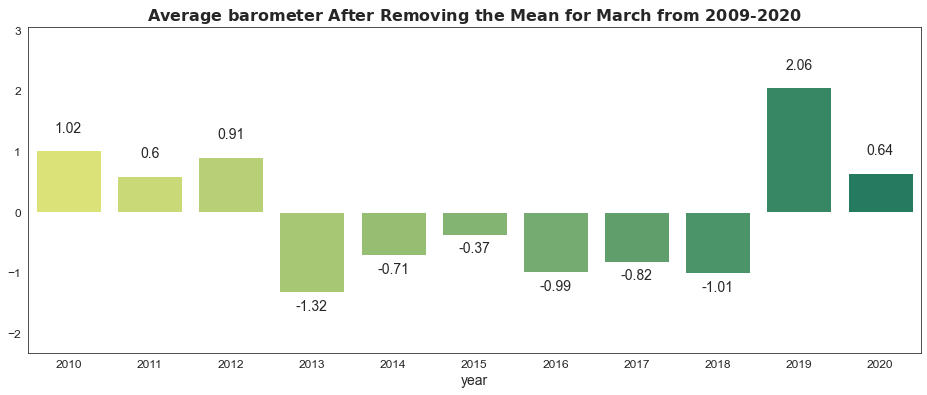

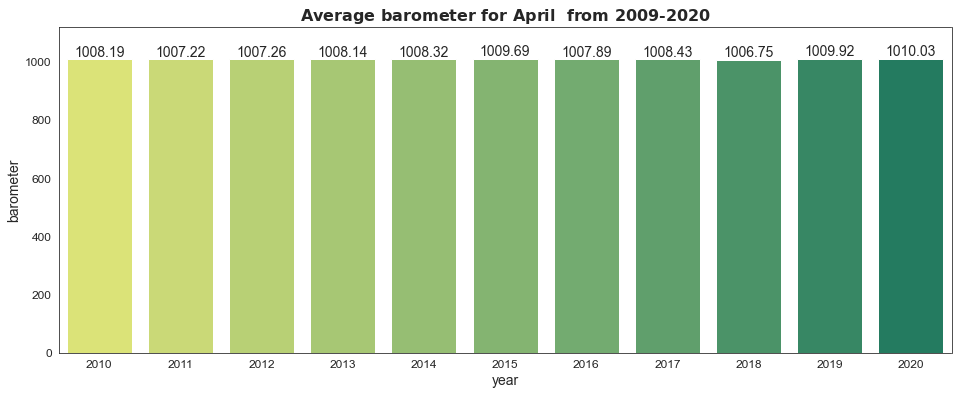

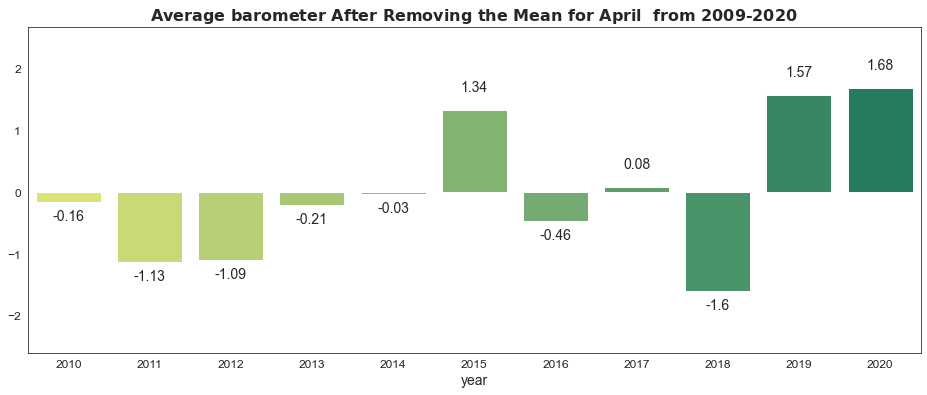

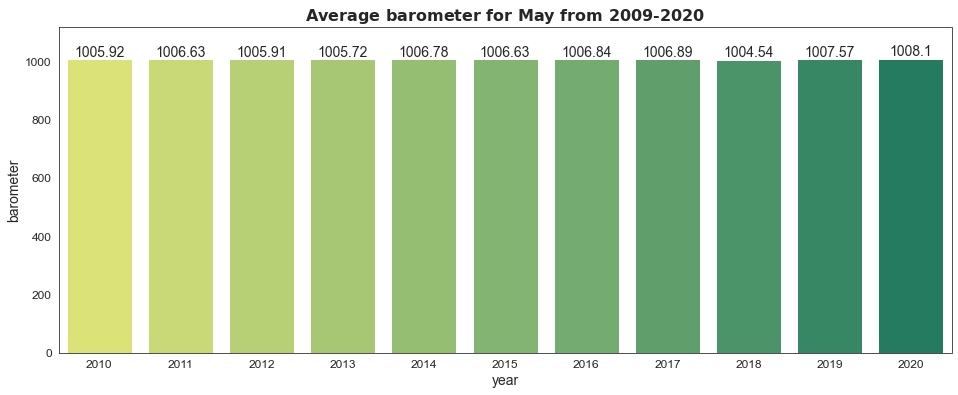

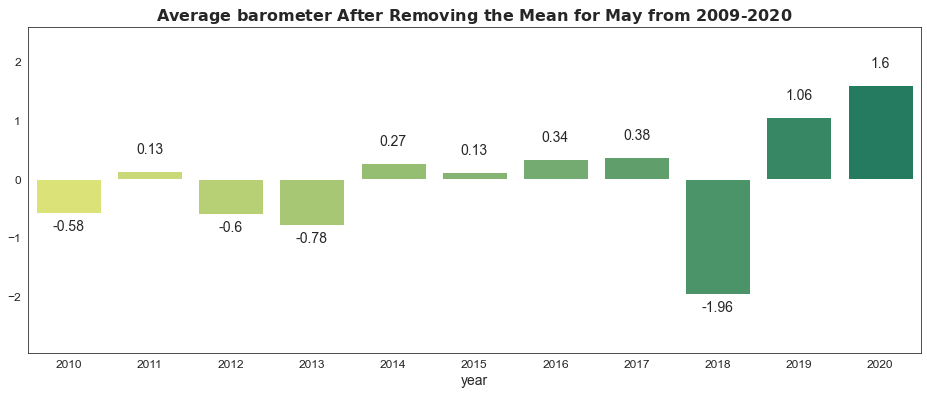

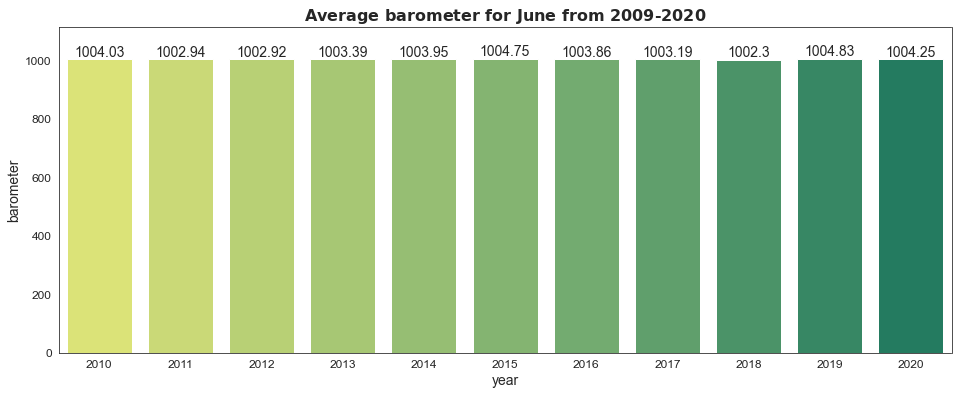

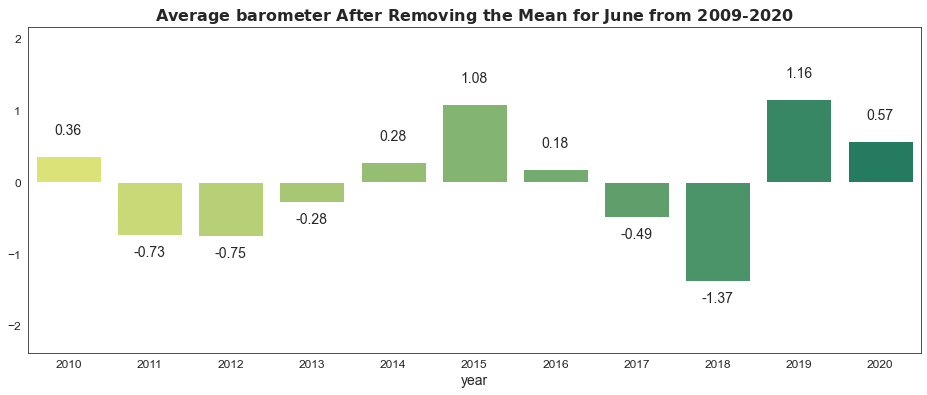

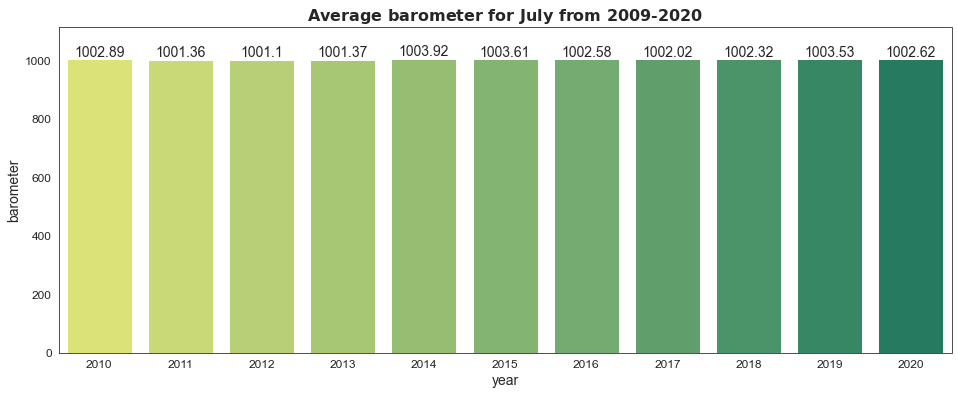

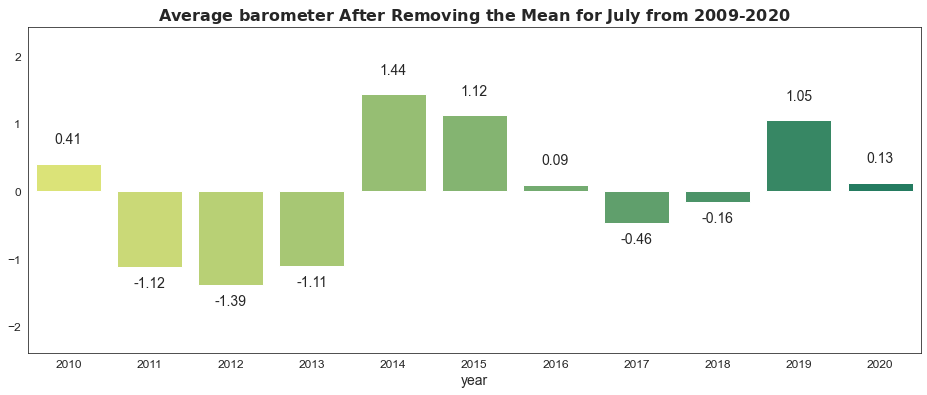

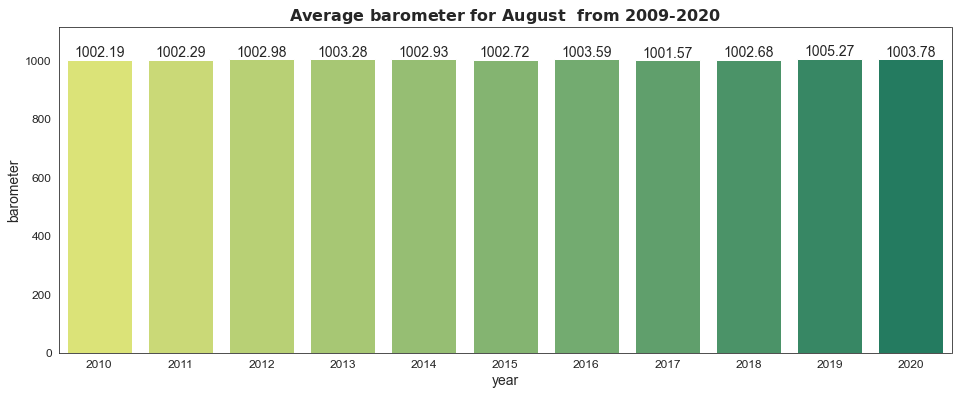

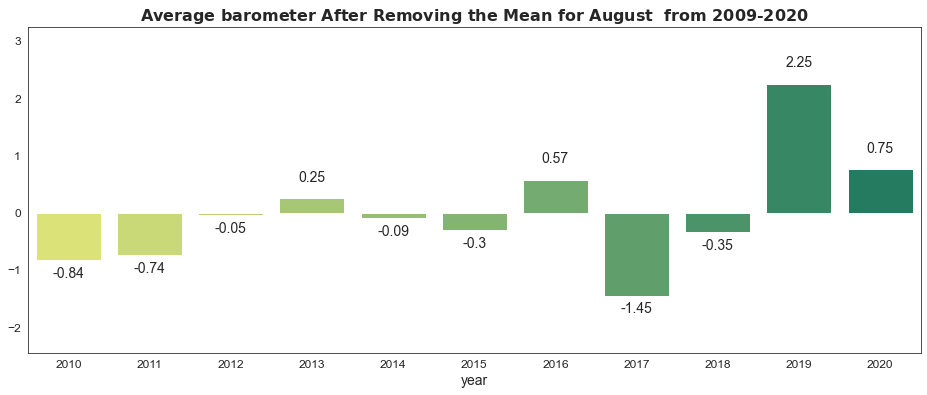

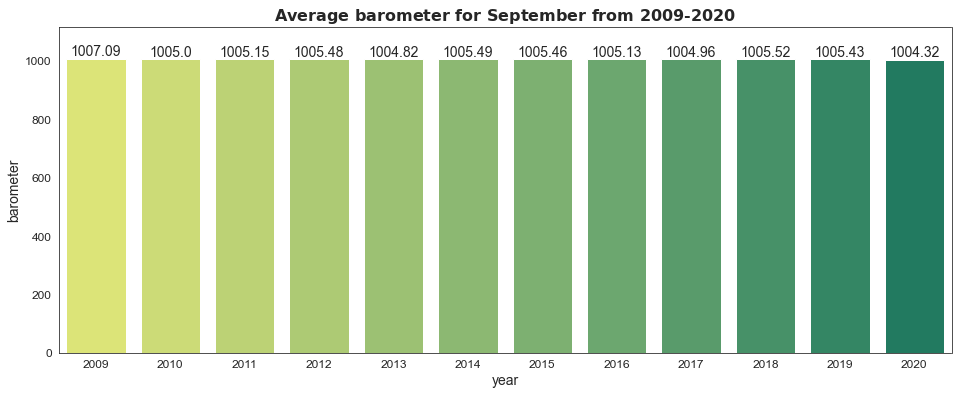

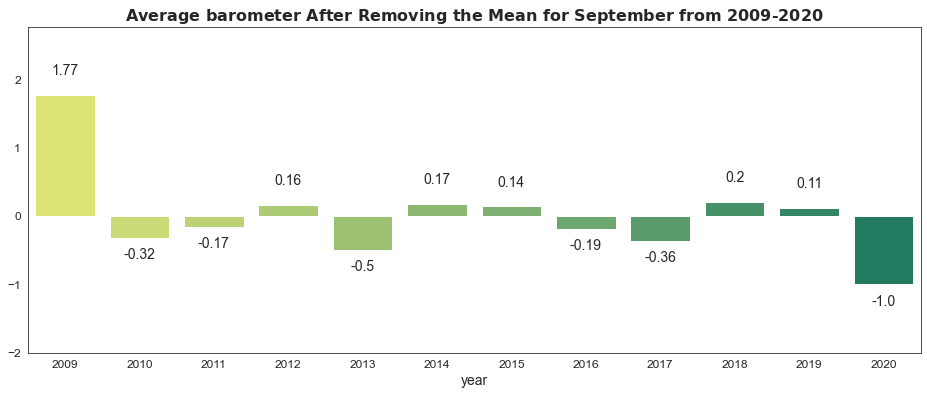

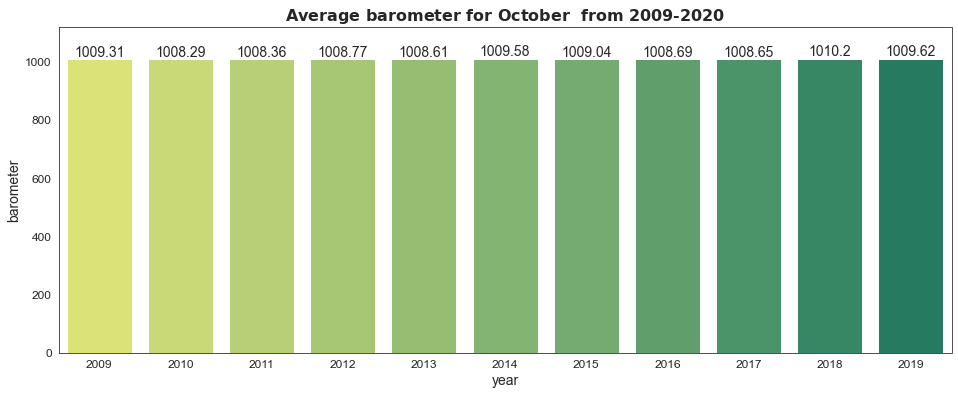

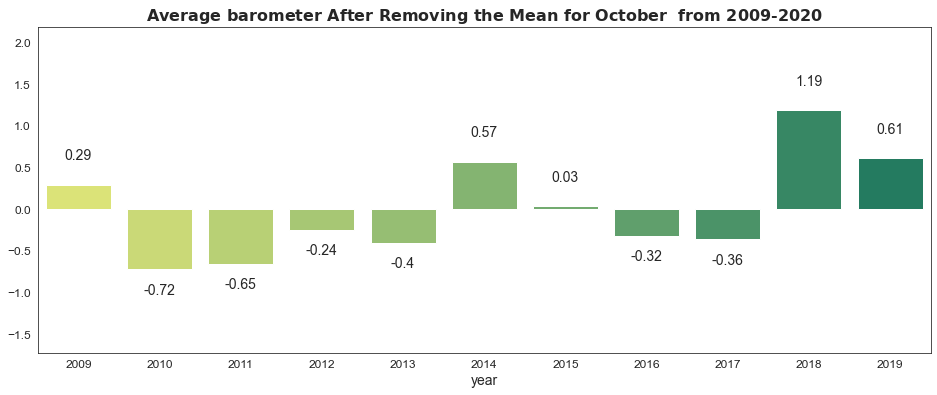

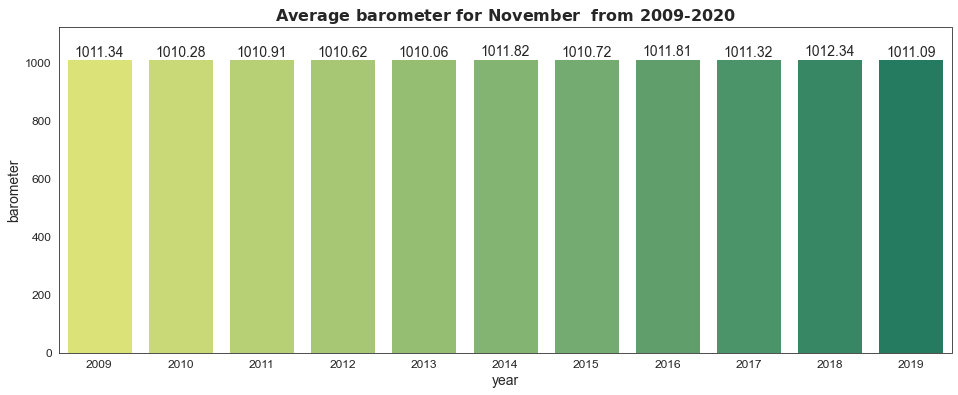

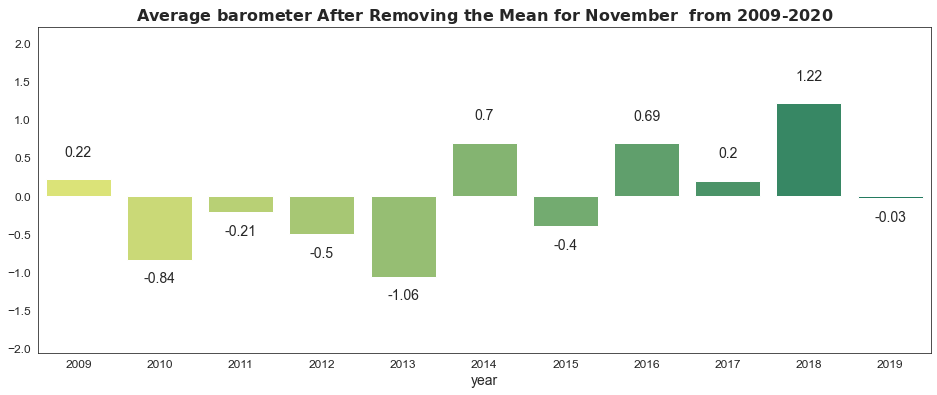

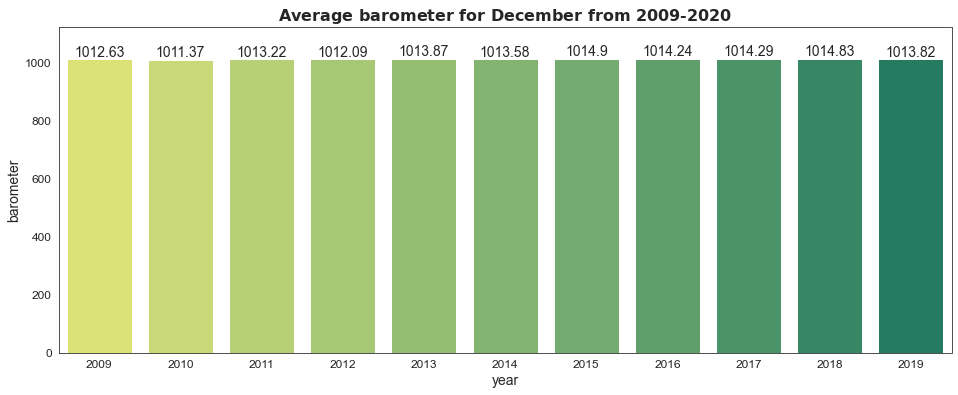

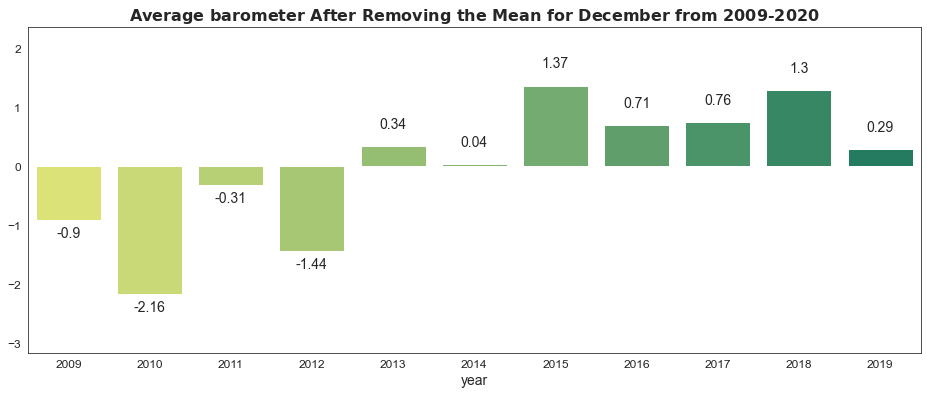

In [33]:
for m in range(1,13):
    get_mean(m, 'barometer')

### 4- Temperature, Wind Speed, Humidity And Barometer Distributions

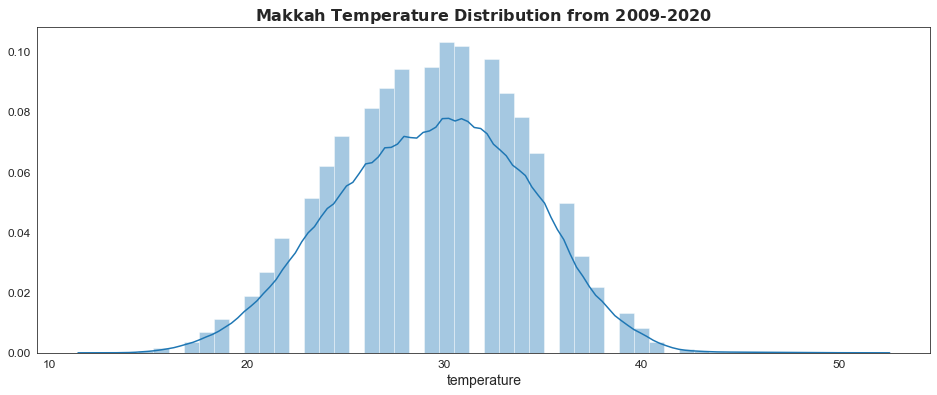

In [34]:
plt.figure(figsize=(16,6));
sns.distplot(makkah_weather.temperature);
plt.title('Makkah $Temperature$ Distribution from 2009-2020', fontsize=16);

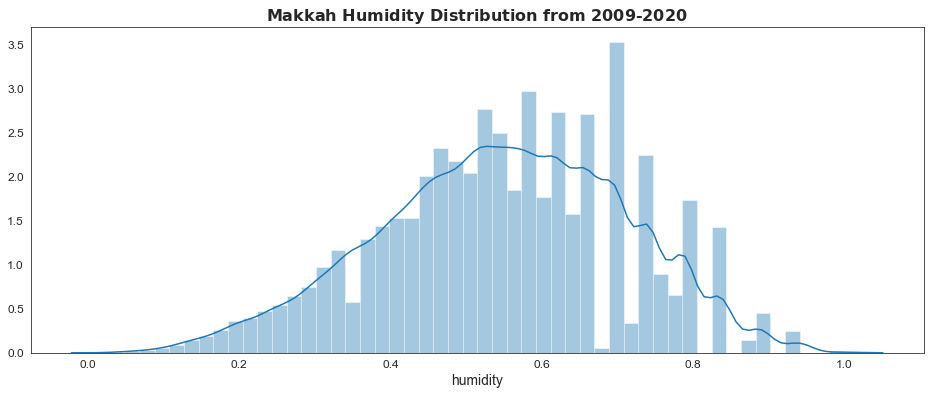

In [35]:
plt.figure(figsize=(16,6));
sns.distplot(makkah_weather.humidity);
plt.title('Makkah $Humidity$ Distribution from 2009-2020', fontsize=16);

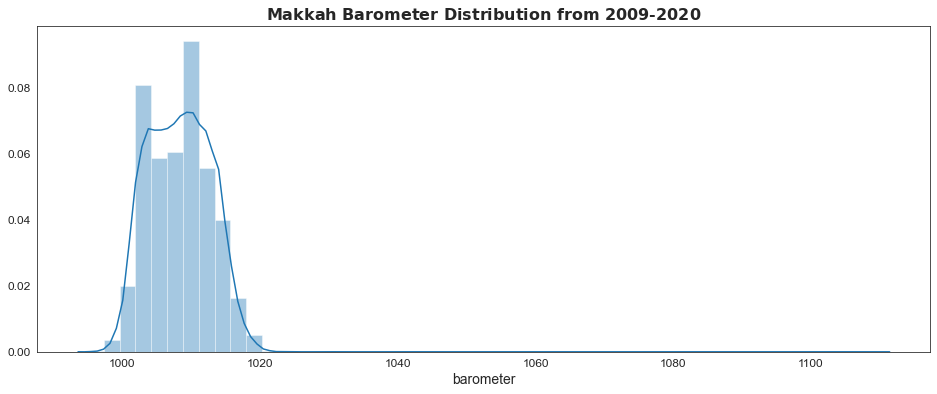

In [36]:
plt.figure(figsize=(16,6));
sns.distplot(makkah_weather.barometer);
plt.title('Makkah $Barometer$ Distribution from 2009-2020', fontsize=16);

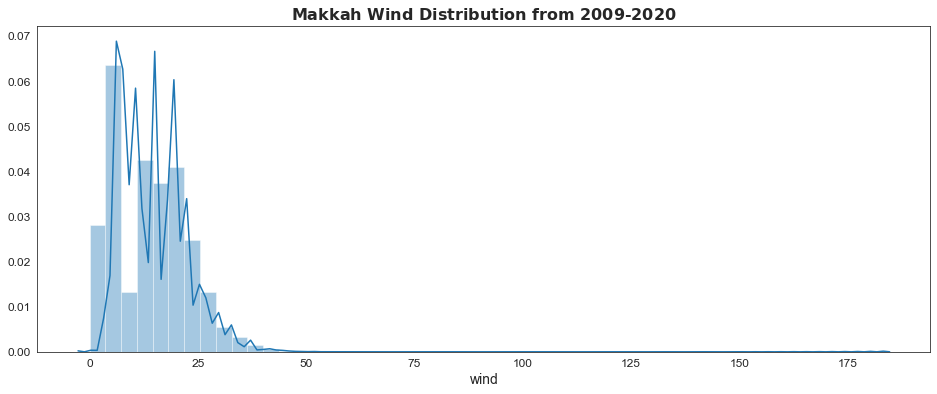

In [37]:
plt.figure(figsize=(16,6));
sns.distplot(makkah_weather.wind);
plt.title('Makkah $Wind$ Distribution from 2009-2020', fontsize=16);

### 5- Weather Condition Count And Its Percentage 

In [38]:
cond = pd.DataFrame(makkah_weather.groupby('condition')['condition'].count())
# print(makkah_weather.groupby('condition')['condition'].count().sum())
cond['ratio'] = makkah_weather.groupby('condition')['condition'].count()/makkah_weather.groupby('condition')['condition'].count().sum()

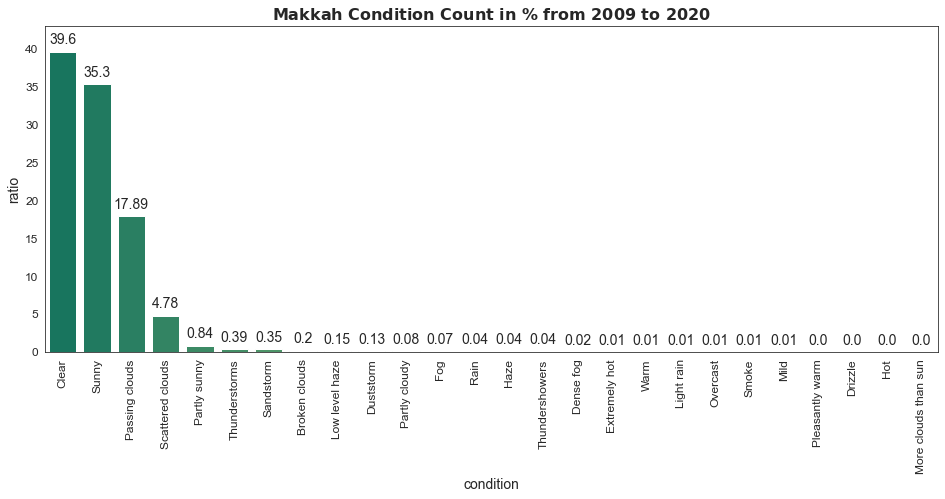

In [39]:
plt.figure(figsize=(16,6))
cond = cond.sort_values(by='ratio', ascending=False);
aa = sns.barplot(x=cond.index, y=cond.ratio*100, palette='summer');
show_values_on_bars(aa, h_v="v", space=1)
plt.xticks(rotation=90);
plt.title('Makkah $Condition$ Count in % from 2009 to 2020', fontsize=16);
plt.ylim(0,43);

In [40]:
print('Weather condition count totally:\n')
print(cond.condition.sort_values(ascending=False))

Weather condition count totally:

condition
Clear                   37907
Sunny                   33793
Passing clouds          17125
Scattered clouds         4578
Partly sunny              804
Thunderstorms             376
Sandstorm                 337
Broken clouds             187
Low level haze            142
Duststorm                 122
Partly cloudy              80
Fog                        69
Rain                       41
Haze                       40
Thundershowers             40
Dense fog                  18
Extremely hot              12
Warm                       10
Light rain                 10
Overcast                    8
Smoke                       7
Mild                        5
Pleasantly warm             4
Drizzle                     4
Hot                         2
More clouds than sun        1
Name: condition, dtype: int64


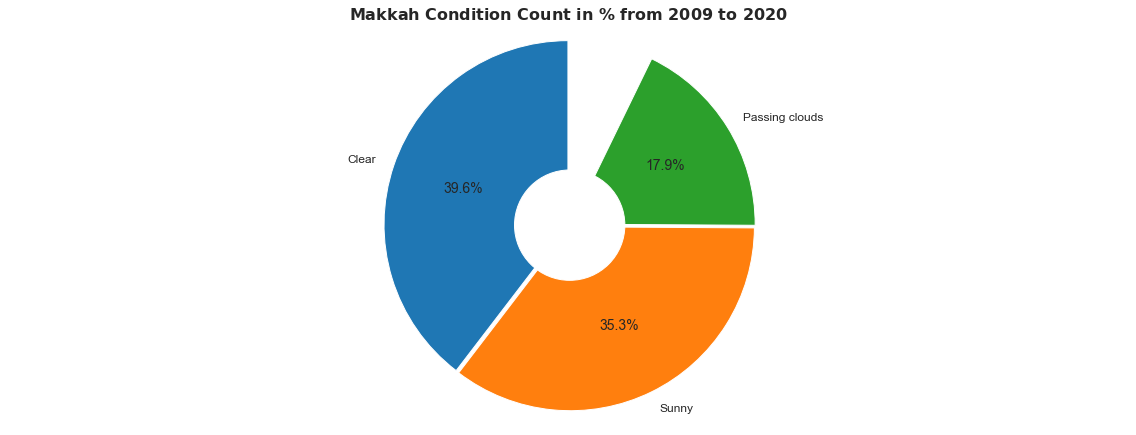

In [41]:
ig = cond[cond.condition > 15000]
tg = cond.loc[ig.index]

# Pie chart
labels = ig.index 

fig1, ax1 = plt.subplots(figsize=(16,6));
ax1.pie(tg.ratio, labels=labels, autopct='%1.1f%%', startangle=90, explode=[0.01,0.01,0.01]);

#draw circle
centre_circle = plt.Circle((0,0),0.30,fc='white');
fig = plt.gcf();
fig.gca().add_artist(centre_circle);

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal');
plt.tight_layout();
plt.title('Makkah $Condition$ Count in % from 2009 to 2020', fontsize=16);
plt.show();

## 4- Save Data

In [42]:
makkah_weather.head()

,city,date,temperature,condition,wind,humidity,barometer,visibility
0,makkah,2009-09-11 00:00:00,30.0,Clear,7.0,0.62,1005.0,16.0
1,makkah,2009-09-11 01:00:00,28.0,Clear,0.0,0.66,1004.0,16.0
2,makkah,2009-09-11 02:00:00,27.0,Clear,7.0,0.66,1004.0,16.0
3,makkah,2009-09-11 03:00:00,27.0,Clear,7.0,0.66,1004.0,16.0
4,makkah,2009-09-11 04:00:00,27.0,Clear,0.0,0.66,1004.0,16.0


In [43]:
makkah_weather.to_csv('../data/cleand.csv', index=False)